# Dataset Analysis - Dataset D + PLUS pipeline analysis
Copyright (C) 2021 ServiceNow, Inc.

This notebook applies the preprocessing cleaning pipeline (v1) to Dataset D, investigating the effect of the pipeline steps.

It also contains subsequent analysis used to produce the PLUS pipeline

In [1]:
import pathlib
import pandas as pd
import re

In [375]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
PDF_DIR = '/nrcan_p2/data/01_raw/20201221/doaj'

#pdfs = [x for x in pathlib.Path(PDF_DIR).glob('**/*.pdf')]
pdfs = [x for x in pathlib.Path(PDF_DIR).rglob('*.pdf')]
pdfs_rel = [pdf.relative_to(PDF_DIR) for pdf in pdfs]
pdfs_rel[0]
pdfs_base = [pathlib.Path(re.sub('/', '__', str(pdf))).stem for pdf in pdfs_rel]
pdfs_base[0]

'material___2075-163X_1_1_1_pdf'

In [4]:
pdfs_df = pd.DataFrame({'file': pdfs, 'base': pdfs_base})
pdfs_df

,file,base
0,/nrcan_p2/data/01_raw/20201221/doaj/material/_...,material___2075-163X_1_1_1_pdf
1,/nrcan_p2/data/01_raw/20201221/doaj/material/_...,material___2075-163X_1_1_109_pdf
2,/nrcan_p2/data/01_raw/20201221/doaj/material/_...,material___2075-163X_1_1_122_pdf
3,/nrcan_p2/data/01_raw/20201221/doaj/material/_...,material___2075-163X_1_1_144_pdf
4,/nrcan_p2/data/01_raw/20201221/doaj/material/_...,material___2075-163X_1_1_157_pdf
...,...,...
3993,/nrcan_p2/data/01_raw/20201221/doaj/quaternary...,quaternary___2571-550X_3_3_28_pdf
3994,/nrcan_p2/data/01_raw/20201221/doaj/quaternary...,quaternary___2571-550X_3_4_29_pdf
3995,/nrcan_p2/data/01_raw/20201221/doaj/quaternary...,quaternary___2571-550X_3_4_30_pdf
3996,/nrcan_p2/data/01_raw/20201221/doaj/quaternary...,quaternary___2571-550X_3_4_31_pdf


In [5]:
CSV_DIR = '/nrcan_p2/data/02_intermediate/20201221/doaj'

csvs = [x for x in pathlib.Path(CSV_DIR).rglob('*.csv')]

In [6]:
len(csvs)

3992

In [7]:
csvs_df = pd.DataFrame({'file': csvs})
csvs_df

,file
0,/nrcan_p2/data/02_intermediate/20201221/doaj/m...
1,/nrcan_p2/data/02_intermediate/20201221/doaj/m...
2,/nrcan_p2/data/02_intermediate/20201221/doaj/m...
3,/nrcan_p2/data/02_intermediate/20201221/doaj/m...
4,/nrcan_p2/data/02_intermediate/20201221/doaj/m...
...,...
3987,/nrcan_p2/data/02_intermediate/20201221/doaj/m...
3988,/nrcan_p2/data/02_intermediate/20201221/doaj/m...
3989,/nrcan_p2/data/02_intermediate/20201221/doaj/m...
3990,/nrcan_p2/data/02_intermediate/20201221/doaj/m...


In [8]:
csvs_df['rel'] = csvs_df.file.apply(lambda x: x.relative_to(CSV_DIR))
csvs_df['base'] = csvs_df.rel.apply(lambda x: pathlib.Path(pathlib.Path(x.stem).stem).stem) #.stem for csv in csvs_rel]

In [9]:
csvs_df

,file,rel,base
0,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_1_1_1_pdf.pdfminer_split....,material___2075-163X_1_1_1_pdf
1,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_1_1_109_pdf.pdfminer_spli...,material___2075-163X_1_1_109_pdf
2,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_1_1_122_pdf.pdfminer_spli...,material___2075-163X_1_1_122_pdf
3,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_1_1_144_pdf.pdfminer_spli...,material___2075-163X_1_1_144_pdf
4,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_1_1_157_pdf.pdfminer_spli...,material___2075-163X_1_1_157_pdf
...,...,...,...
3987,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_8_12_602_pdf.pdfminer_spl...,material___2075-163X_8_12_602_pdf
3988,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_8_2_48_pdf.pdfminer_split...,material___2075-163X_8_2_48_pdf
3989,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_8_2_49_pdf.pdfminer_split...,material___2075-163X_8_2_49_pdf
3990,/nrcan_p2/data/02_intermediate/20201221/doaj/m...,material___2075-163X_8_2_50_pdf.pdfminer_split...,material___2075-163X_8_2_50_pdf


In [10]:
csvs_df['folder'] = csvs_df.file.apply(lambda x: x.parent / '/'.join(x.stem.split('__')[:-1]))

In [11]:
files_df = pd.merge(csvs_df, pdfs_df, on='base', how='left', suffixes=('', '_pdf'))

In [12]:
files_df.folder.value_counts()

/nrcan_p2/data/02_intermediate/20201221/doaj/material                           1597
/nrcan_p2/data/02_intermediate/20201221/doaj/geosciences                        1315
/nrcan_p2/data/02_intermediate/20201221/doaj/solid_earth                         799
/nrcan_p2/data/02_intermediate/20201221/doaj/geochemical_perspective_letters     179
/nrcan_p2/data/02_intermediate/20201221/doaj/quaternary                          102
Name: folder, dtype: int64

In [13]:
sample_df = files_df.groupby('folder').sample(50)
sample_df

,file,rel,base,folder,file_pdf
2069,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,geochemical_perspective_letters___documents_GP...,geochemical_perspective_letters___documents_GP...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,/nrcan_p2/data/01_raw/20201221/doaj/geochemica...
2209,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,geochemical_perspective_letters___documents_GP...,geochemical_perspective_letters___documents_GP...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,/nrcan_p2/data/01_raw/20201221/doaj/geochemica...
722,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,geochemical_perspective_letters___documents_GP...,geochemical_perspective_letters___documents_GP...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,/nrcan_p2/data/01_raw/20201221/doaj/geochemica...
341,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,geochemical_perspective_letters___documents_GP...,geochemical_perspective_letters___documents_GP...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,/nrcan_p2/data/01_raw/20201221/doaj/geochemica...
621,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,geochemical_perspective_letters___documents_GP...,geochemical_perspective_letters___documents_GP...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,/nrcan_p2/data/01_raw/20201221/doaj/geochemica...
...,...,...,...,...,...
1807,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,solid_earth___10_447_2019_se-10-447-2019.pdf.p...,solid_earth___10_447_2019_se-10-447-2019.pdf,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,/nrcan_p2/data/01_raw/20201221/doaj/solid_eart...
2285,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,solid_earth___9_115_2018_se-9-115-2018.pdf.pdf...,solid_earth___9_115_2018_se-9-115-2018.pdf,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,/nrcan_p2/data/01_raw/20201221/doaj/solid_eart...
2633,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,solid_earth___11_1969_2020_se-11-1969-2020.pdf...,solid_earth___11_1969_2020_se-11-1969-2020.pdf,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,/nrcan_p2/data/01_raw/20201221/doaj/solid_eart...
1975,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,solid_earth___8_789_2017_se-8-789-2017.pdf.pdf...,solid_earth___8_789_2017_se-8-789-2017.pdf,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,/nrcan_p2/data/01_raw/20201221/doaj/solid_eart...


In [14]:
sample_df.file.nunique()

250

In [15]:
sample_df.to_csv('sample_dataset_d_50.csv')

In [4]:
import pandas as pd
sample_df = pd.read_csv('sample_dataset_d_50.csv')

## PDFs

In [5]:
dfs = []
for irow, row in sample_df.iterrows(): #sample_df.groupby('folder').sample(3).iterrows():
    #print(irow, row)
    pdf_file = row.file_pdf
    csv_file = row.file
    #print(pdf_file)
    #print(csv_file)
    dfs.append(pd.read_csv(csv_file))
    #! cp pdf_file .
    #break
dfs = pd.concat(dfs)
dfs

,Unnamed: 0,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file
0,0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,233.883900,501.594100,359.998300,510.154100,© 2016 European Association of Geochemistry\n,/nrcan_p2/data/02_intermediate/20201221/doaj/g...
1,1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,63.000000,457.275600,359.951200,489.865600,Mononuclear U(IV) complexes and ningyoite \nas...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...
2,2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,96.810300,398.525600,329.378900,445.816100,"G. Morin1*, A. Mangeret2, G. Othmane1, L. Stet...",/nrcan_p2/data/02_intermediate/20201221/doaj/g...
3,3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,263.623900,353.583100,353.779600,363.213100,doi: 10.7185/geochemlet.1610\n,/nrcan_p2/data/02_intermediate/20201221/doaj/g...
4,4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,53.999900,203.728100,355.905650,365.125600,Abstract \nNatural attenuation of uranium in s...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...
...,...,...,...,...,...,...,...,...,...
180,180,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,46.488000,37.786029,182.492913,49.273368,www.solid-earth.net/3/111/2012/\n,/nrcan_p2/data/02_intermediate/20201221/doaj/s...
181,181,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,424.504146,37.786029,548.221500,49.273368,"Solid Earth, 3, 111–119, 2012\n",/nrcan_p2/data/02_intermediate/20201221/doaj/s...
182,182,<class 'pdfminer.layout.LTLine'>,8,176.025000,616.984000,178.715000,616.984000,NaN,/nrcan_p2/data/02_intermediate/20201221/doaj/s...
183,183,<class 'pdfminer.layout.LTLine'>,8,284.743000,540.271000,287.433000,540.271000,NaN,/nrcan_p2/data/02_intermediate/20201221/doaj/s...


## Number of files, pages, docs etc.

In [6]:
print('Number of pages overall:')
print(dfs.groupby(['file', 'pg']).ngroups)

print('Number of documents overall:')
print(dfs.groupby('file').ngroups)

#print('Number of entries overall:')
#print(df.groupby('id1').ngroups)

Number of pages overall:
3778
Number of documents overall:
250


Text(0.5, 1.0, 'Number of pages per pdf')

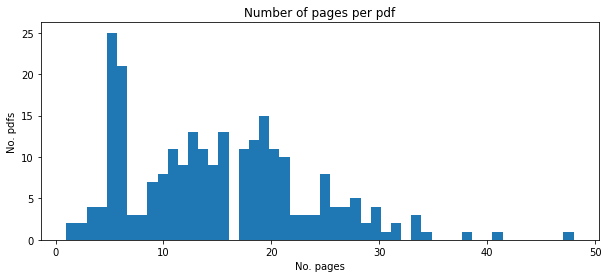

In [18]:
v = dfs[['file', 'pg']].groupby(['file']).pg.nunique()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

Text(0.5, 1.0, 'Number of pages per pdf')

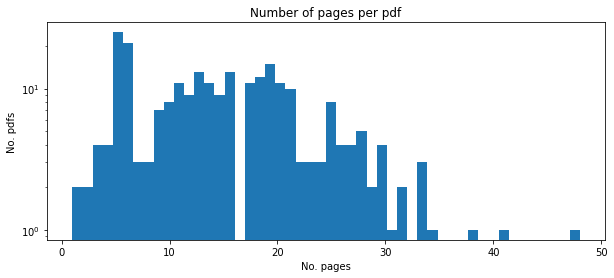

In [19]:
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

In [20]:
percentiles = [0, 0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1]
v.describe(percentiles=percentiles).to_frame()

,pg
count,250.000000
mean,15.112000
std,8.306107
min,1.000000
0%,1.000000
1%,2.000000
10%,5.000000
20%,6.000000
25%,8.000000
30%,10.000000


**analysis** (remember thisis a sample) there documents in this dataset are shorter overall than the nrcan docs (median down from 32 -> 15 pg)
The max number of pg/file is also lower 1599 -> 48. This is significantly smaller than even the ontario/etc articles, but on average, not so different.

In [21]:
dfs[dfs.text.isnull()].shape

(50085, 9)

In [22]:
dfs = dfs[~dfs.text.isnull()]

Text(0.5, 1.0, 'Number of pages per pdf')

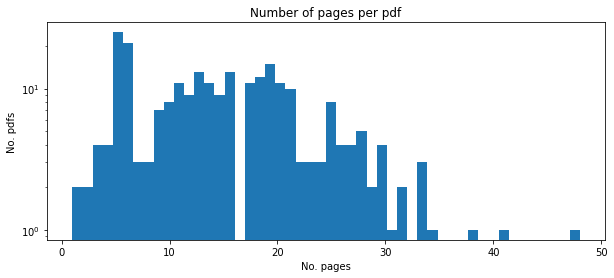

In [23]:
v = dfs[['file', 'pg']].groupby(['file']).pg.nunique()
import matplotlib.pyplot as plt
v.plot.hist(bins=50, figsize=(10,4))
plt.yscale('log')
plt.xlabel('No. pages')
plt.ylabel('No. pdfs')
plt.title('Number of pages per pdf')

In [24]:
percentiles = [0, 0.01,0.1,0.2,0.25,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.99, 1]
v.describe(percentiles=percentiles).to_frame()

,pg
count,250.000000
mean,15.112000
std,8.306107
min,1.000000
0%,1.000000
1%,2.000000
10%,5.000000
20%,6.000000
25%,8.000000
30%,10.000000


In [25]:
250/342  #292/342

0.7309941520467836

**analysis** note that we went from 342 -> 250 documents (27% loss)

## Width/height

In [7]:
dfs['width'] = dfs.pos_x1 - dfs.pos_x0
print('...height')
dfs['height'] = dfs.pos_y1 - dfs.pos_y0

...height


[None]

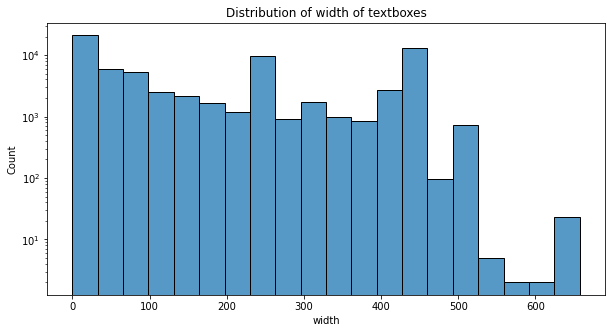

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='width', label='width', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of width of textboxes')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

**analysis** this might suggest that the dataset is full of single-column documents?

[None]

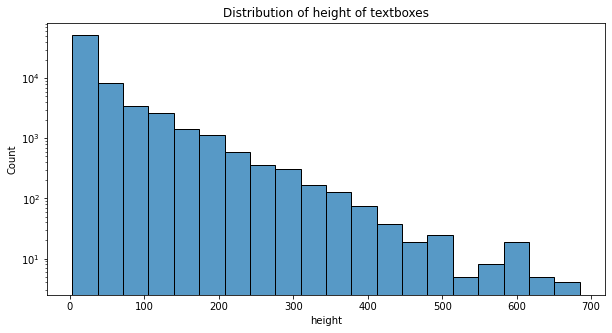

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='height', label='width', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of height of textboxes')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

**analysis** compared to the nrcan and ontario etc articles, these seem to be much more uniform - cleaner?

## N chars

In [8]:
dfs['nchars_stripped'] = dfs.text.str.strip().str.len()

[None]

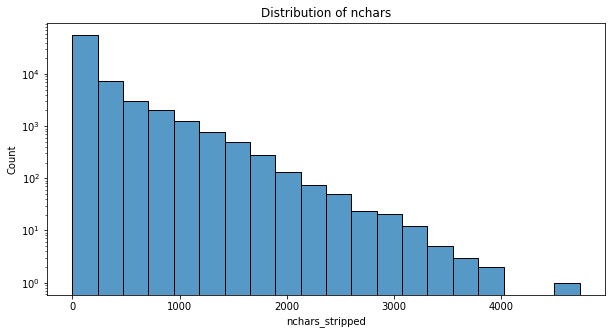

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x='nchars_stripped', label='nchars_stripped', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of nchars')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

**analysis** there are no particularly bad files... but a couple of textboxes with >4k

In [37]:
with pd.option_context('display.max_colwidth', None):
    display(dfs[dfs.nchars_stripped > 3000].text.to_frame())

,text
562,"We then calculated the Cu isotope composition for each HM scenario \nrequired to drive the equilibrating silicate (i.e. the mantle) towards the modern-\nday BSE value. This is shown in Figure 3b, where a smaller HM results in a more \nnegative HM Cu isotope composition. We calculate a range of HM Cu isotope \ncompositions because our preliminary experiments were simply used to assess the \nsense, not the magnitude of isotope fractionation; however, because large isotope \nfractionations (> 2 ‰) are not expected at the temperatures associated with the \nformation of a HM (3000-4000 K), a minimum thickness of ~2 km is predicted, \neven for the most Cu-rich HM. The maximum size for each HM as controlled \nby its Cu concentration corresponds to a minimum Δ65Cusulphide-silicate value of \n~ –0.6 ‰. To further constrain this model, further work is required to accurately \nparameterise Cu isotope fractionation factors, but these model predictions are \nin general agreement with our experimental data (Supplementary Information).\nAdmixing a Fe-O-S liquid into Earth’s core will affect core composition, \nspecifically with regard to the light elements S and O. Given the constraints \nprovided above (HM mass ≤ 1.6 % of Earth’s core), addition of a HM to the core \nwill have a small effect on the core O composition (< 0.25 wt. % addition); for S, \nthe effect is more significant – our model suggests that up to ~0.5 wt. % S could be \nadded (Fig. 3a), which is in line with recent estimates based on molecular dynamics \n(Badro et al., 2014) and siderophile element partitioning studies (Siebert et al., \n2013) – of course, this does not preclude further core addition of S as a metal alloy.\nFinally, we estimate the effect that removal of the HM could have on mantle \nlead isotope composition. Lead can be strongly chalcophile, and an early fraction-\nation of isotopically primitive Pb by a sulphide-rich phase is often cited as a solu-\ntion to the 1st terrestrial Pb paradox; that is, the observation that, in 206Pb/204Pb \nvs. 207Pb/204Pb space, most mantle-derived rocks, continental sediments etc. plot \nto the right of the terrestrial geochron (either the meteoritic, 4.568 Ga geochron \nor the later Hf-W core formation cessation age of ~4.53 Ga, Fig. 4; Kramers and \nTolstikhin, 1997). Modelling the evolution of mantle Pb isotope composition \nresulting from two fractionation events, metal-silicate equilibration at 50 Ma \nand sulphide-silicate equilibration at 100 Ma (following Galer and Goldstein, \n1996; see Supplementary Information for details), predicts a present-day mantle \nPb isotopic composition that is comparable to empirical estimates for BSE, albeit \nthe more unradiogenic ones (Fig. 4; Halliday, 2004) as well as the Pb composi-\ntion of the ancient primitive mantle as estimated using flood basalts (Jackson \nand Carlson, 2011). Therefore, this does not preclude further unradiogenic Pb \nreservoirs, such as sulphides in refractory mantle phases (Burton et al., 2012) or \nlate accretion of mantle Pb (Albarède, 2009).\n"
569,"in the upper part (30 m) of the member indicate deeply palaeo-weathered allu-\nvium (Stewart, 2002). However, within the 3–30 m interval that contains the \ncalcareous and grey shale we observed flaser, pin-stripe and lenticular bedding; \nmultiple reactivation surfaces; mud drapes and herringbone cross-lamination \n(Fig. 1). These features are strong evidence of tidally influenced sedimentation on \nmarine tidal flats (Davis Jr., 2012). Closely interfingered marine and non-marine \ndeposition is not uncommon in the rock record. For example, recent discoveries \nof tidal indicators in the Ordovician Juniata Formation raised doubts about some \nof the oldest purported evidence for land colonisation by animal life (Davies et al., \n2010). Our sedimentological observations raise similar concerns for the eukary-\notic biota of the Stoer Group (Cloud and Germs, 1971). This view is supported \nby our geo

**analysis** these are all legit! We might not even need to remove the cid() for this dataset

In [9]:
import pathlib
REPO_DIR = pathlib.Path(__name__).parent.absolute().parent
print(REPO_DIR)

import sys
sys.path.append(str(REPO_DIR))

/nrcan_p2/workspace/sraimondo/nrcan_p2


In [10]:
from nrcan_p2.data_processing.pipelines import BASE_PIPELINE, SIMPLE_PIPELINE_GLOVE_3, SIMPLE_PIPELINE_BERT_3, POSTPIPE_GLOVE, POSTPIPE_BERT_SPACY_2

In [11]:
BASE_PIPELINE

[<function nrcan_p2.data_processing.preprocessing_dfcol.rm_dbl_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_cid(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.convert_to_ascii(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_nonprintable(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_word_all_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_beg_end_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_punct_mid_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l2_word(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <func

In [16]:
dfs['text_-1'] = dfs['text'].astype('str')

In [17]:
for i in range(0,4):
    print(i, BASE_PIPELINE[i])
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

0 <function rm_dbl_space at 0x7fb6aa6ae5e0>
1 <function rm_cid at 0x7fb69caca8b0>
2 <function convert_to_ascii at 0x7fb69cacaaf0>
3 <function rm_nonprintable at 0x7fb69cacad30>


See if there are any significant differences from steps 0-3 (inclusive)

In [18]:
i = 3
dfs[f'nchars_{i}'] = dfs[f'text_{i}'].str.len()

[None]

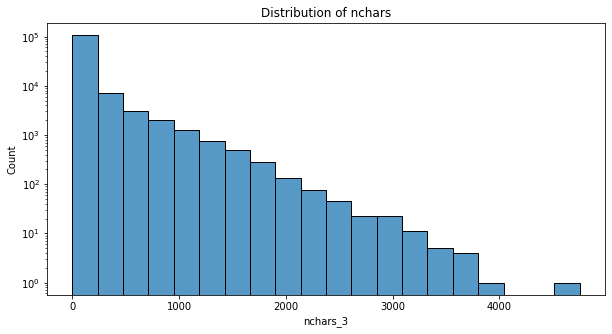

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.histplot(data=dfs, x=f'nchars_{i}', bins=20)
#sns.lineplot(data=dim_dist, x='perc', y='height', label='height', marker='o', markersize=4)
plt.title('Distribution of nchars')
#plt.legend()
#plt.ylabel('pixels')
plt.gca().set(yscale='log')

**analysis** basically the same

In [20]:
dfs = dfs.reset_index(drop=True)

In [21]:
BASE_PIPELINE[4]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_letter(df, col)>

In [22]:
i = 4
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')
display(dfs_filtered)

,Unnamed: 0,obj_type,pg,pos_x0,pos_y0,pos_x1,pos_y1,text,file,width,height,nchars_stripped,text_-1,text_0,text_1,text_2,text_3,nchars_3,letter_count
0,0,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,233.883900,501.594100,359.998300,510.154100,© 2016 European Association of Geochemistry\n,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,126.114400,8.560000,43.0,© 2016 European Association of Geochemistry\n,© 2016 European Association of Geochemistry\n,© 2016 European Association of Geochemistry\n,(c) 2016 European Association of Geochemistry\n,(c) 2016 European Association of Geochemistry\n,46,34
1,1,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,63.000000,457.275600,359.951200,489.865600,Mononuclear U(IV) complexes and ningyoite \nas...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,296.951200,32.590000,85.0,Mononuclear U(IV) complexes and ningyoite \nas...,Mononuclear U(IV) complexes and ningyoite \nas...,Mononuclear U(IV) complexes and ningyoite \nas...,Mononuclear U(IV) complexes and ningyoite \nas...,Mononuclear U(IV) complexes and ningyoite \nas...,86,71
2,2,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,96.810300,398.525600,329.378900,445.816100,"G. Morin1*, A. Mangeret2, G. Othmane1, L. Stet...",/nrcan_p2/data/02_intermediate/20201221/doaj/g...,232.568600,47.290500,199.0,"G. Morin1*, A. Mangeret2, G. Othmane1, L. Stet...","G. Morin1*, A. Mangeret2, G. Othmane1, L. Stet...","G. Morin1*, A. Mangeret2, G. Othmane1, L. Stet...","G. Morin1*, A. Mangeret2, G. Othmane1, L. Stet...","G. Morin1*, A. Mangeret2, G. Othmane1, L. Stet...",197,117
3,3,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,263.623900,353.583100,353.779600,363.213100,doi: 10.7185/geochemlet.1610\n,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,90.155700,9.630000,28.0,doi: 10.7185/geochemlet.1610\n,doi: 10.7185/geochemlet.1610\n,doi: 10.7185/geochemlet.1610\n,doi: 10.7185/geochemlet.1610\n,doi: 10.7185/geochemlet.1610\n,29,13
4,4,<class 'pdfminer.layout.LTTextBoxHorizontal'>,0,53.999900,203.728100,355.905650,365.125600,Abstract \nNatural attenuation of uranium in s...,/nrcan_p2/data/02_intermediate/20201221/doaj/g...,301.905750,161.397500,1472.0,Abstract \nNatural attenuation of uranium in s...,Abstract \nNatural attenuation of uranium in s...,Abstract \nNatural attenuation of uranium in s...,Abstract \nNatural attenuation of uranium in s...,Abstract \nNatural attenuation of uranium in s...,1451,1210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120623,180,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,46.488000,37.786029,182.492913,49.273368,www.solid-earth.net/3/111/2012/\n,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,136.004913,11.487339,31.0,www.solid-earth.net/3/111/2012/\n,www.solid-earth.net/3/111/2012/\n,www.solid-earth.net/3/111/2012/\n,www.solid-earth.net/3/111/2012/\n,www.solid-earth.net/3/111/2012/\n,32,16
120624,181,<class 'pdfminer.layout.LTTextBoxHorizontal'>,8,424.504146,37.786029,548.221500,49.273368,"Solid Earth, 3, 111–119, 2012\n",/nrcan_p2/data/02_intermediate/20201221/doaj/s...,123.717354,11.487339,29.0,"Solid Earth, 3, 111–119, 2012\n","Solid Earth, 3, 111–119, 2012\n","Solid Earth, 3, 111–119, 2012\n","Solid Earth, 3, 111-119, 2012\n","Solid Earth, 3, 111-119, 2012\n",30,10
120625,182,<class 'pdfminer.layout.LTLine'>,8,176.025000,616.984000,178.715000,616.984000,NaN,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,2.690000,0.000000,NaN,nan,nan,nan,nan,nan,3,3
120626,183,<class 'pdfminer.layout.LTLine'>,8,284.743000,540.271000,287.433000,540.271000,NaN,/nrcan_p2/data/02_intermediate/20201221/doaj/s...,2.690000,0.000000,NaN,nan,nan,nan,nan,nan,3,3


In [25]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

,text_3
30943,\n
82841,1302-182333-8\n
48181,48.\n
115664,176\n53\n39\n8\n4\n
62076,86.\n
86224,3.\n
65266,\n
67020,70\n10\n60\n30\n
77752,(2)\n
51209,=\n


In [26]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(120628, 19)
(107887, 19)
0.10562224359186922


In [27]:
dfs = dfs_filtered

In [28]:
dfs.shape

(107887, 19)

**analysis** this removed 18% of the boxes (Which is about half the number as nrcan.) And a bunch of the textboxes are blank ones or table columns.

In [29]:
i = 5
BASE_PIPELINE[i]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_word_all_punct(dfcol)>

In [30]:
for i in range(5,6):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-2}'])

In [32]:
last_i = i-2
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
print(res.shape)
res = res.sample(20)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

(5170, 20)


,text_3,text_5
70187,"For the investigation of the stability of the microemulsion (experiment (1), Table 2) a certain\namount of saponified organic phase was mixed with 5 mL HNO3 solution (c = 0.2 mol/L) and\nthe mixture was shaken in an overhead shaker at different phase ratios (PR, Equation (3)) at room\ntemperature for 30 min.\n","For the investigation of the stability of the microemulsion (experiment (1), Table 2) a certain\namount of saponified organic phase was mixed with 5 mL HNO3 solution (c 0.2 mol/L) and\nthe mixture was shaken in an overhead shaker at different phase ratios (PR, Equation (3)) at room\ntemperature for 30 min.\n"
69198,Table 2. The mineralogical composition of the actual Mo ore (wt %).\n,Table 2. The mineralogical composition of the actual Mo ore (wt \n
71741,C2\n-\n-\n-\n,C2\n\n\n\n
67615,"Trace element data are presented in Table S2. For comparison, data for Eocene alkali basalts\nfrom Shuangliao and tholeiitic diabases from Qianjiadian are also plotted in Figure 8. All samples are\nenriched in large-ion lithophile elements (LILE) and light rare earth elements (LREEs), with obvious\npositive Ba and Sr anomalies and negative Th, U, and P anomalies (Figure 8a). In general, the AB group\nhas higher LREE contents (La = 18.42-53.71 ppm) and LREE/HREE ratios ((La/Yb) N = 10.53-35.91) than\nthe TB group (La = 7.52-15.29 ppm, (La/Yb) N = 3.80-7.41). In addition, the samples of AB group show\npositive Nb-Ta anomalies, which are similar to oceanic island basalt (OIB) (Figure 8b), whereas the TB\nsamples display lower abundances of most trace elements similar to those of enriched mid-oceanic\nridge basalt (E-MORB).\n","Trace element data are presented in Table S2. For comparison, data for Eocene alkali basalts\nfrom Shuangliao and tholeiitic diabases from Qianjiadian are also plotted in Figure 8. All samples are\nenriched in large-ion lithophile elements (LILE) and light rare earth elements (LREEs), with obvious\npositive Ba and Sr anomalies and negative Th, U, and P anomalies (Figure 8a). In general, the AB group\nhas higher LREE contents (La 18.42-53.71 ppm) and LREE/HREE ratios ((La/Yb) N 10.53-35.91) than\nthe TB group (La 7.52-15.29 ppm, (La/Yb) N 3.80-7.41). In addition, the samples of AB group show\npositive Nb-Ta anomalies, which are similar to oceanic island basalt (OIB) (Figure 8b), whereas the TB\nsamples display lower abundances of most trace elements similar to those of enriched mid-oceanic\nridge basalt (E-MORB).\n"
56777,"The histogram in Figure 7 shows that most of the values fall between intervals of 30 Bq/m3 to\n45 Bq/m3, which mainly corresponds to the levels found in regions away from tailings. The expected\ntypical outdoor average radon concentration is 10 Bq/m3 [11]. The overall values for the whole dataset\nindicated radon levels above the world mean radon concentration in outdoor environments and\nare also higher when compared to levels found in other studies [35,36]. The obtained radon levels\nthat are higher than average could be enhanced by elevated uranium and associated radionuclides\ncontained in tailings residues, whereas the wide variability observed could be explained by the\ndiversity of mineralisation in source-terms. However, the results from linear regression analysis, as\nshown in Figure 8, revealed a weak positive correlation (R2 = 0.1483), which also coincides with the\nresults obtained from Spearman Correlation analysis (rs = 0.09440). The selection criteria for the\npresented correlation coefficients were based on uranium and radon levels measured in the same\nlocations. Furthermore, it is worth noting that there are few pairs of values of uranium and radon\nunder this criterion.\n","The histogram in Figure 7 shows that most of the values fall between intervals of 30 Bq/m3 to\n45 Bq/m3, which mainly corresponds to the levels found in regions away from tailings. The expected\ntypical outdoor average radon concentration is 10 Bq/m3 [11]. The overall values for the whole 

**analysis** the rm_word_all_punct function is really only removing "=" in equations, "%" and "+/-"
**conclusions** we will have to not run the `<function nrcan_p2.data_processing.preprocessing_dfcol.rm_word_all_punct(dfcol)>` function for final processing etc.

In [36]:
5170/dfs.shape[0]

0.04792050942189513

In [35]:
print('number of characters overall pre:')
a = dfs[f'text_{i-2}'].str.len().sum()
print('number of characters overall post:')
b = dfs[f'text_{i}'].str.len().sum()
print(a, b, a-b, b/a, 1-b/a)

number of characters overall pre:
number of characters overall post:
12863616 12850307 13309 0.9989653764540235 0.0010346235459764985


**analysis** this affected 5k rows (4%) (significantly fewer than for nrcan), and they look reasonable, about 0.1% of the text was removed (much less than for nrcan, since this is much cleaner)

In [37]:
BASE_PIPELINE[6:]

[<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_beg_end_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_punct_mid_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l2_word(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7fb6aba2ec70>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dic

In [38]:
for i in range(6,10):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

In [39]:
dfs.to_parquet(f'/nrcan_p2/data/02_intermediate/20201221/dataset_d_{i}.parquet')

In [113]:
import pandas as pd
dfs = pd.read_parquet(f'/nrcan_p2/data/02_intermediate/20201221/dataset_d_9.parquet')

In [42]:
i = 6
print(i, BASE_PIPELINE[i])
last_i = i-1
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res.shape)
display(res.shape[0] / dfs.shape[0])
res = res.sample(10)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

6 <function rm_newline_hyphenation at 0x7fb69caa3280>


(5771, 24)

0.053491152780223754

,text_5,text_6
15072,"BuseMAnn, H., BAur, H., wieler, r. (2000) Primordial noble gases in \n""phase Q"" in carbonaceous and ordinary chondrites studied by closed-\nsystem stepped etching. Meteoritics and Planetary Science 35, 949-973.\ncArAcAusi, A., Avice, G., BurnArD, P.G., Furi, e., MArty, B. (2016) \n","BuseMAnn, H., BAur, H., wieler, r. (2000) Primordial noble gases in \n""phase Q"" in carbonaceous and ordinary chondrites studied by closedsystem stepped etching. Meteoritics and Planetary Science 35, 949-973.\ncArAcAusi, A., Avice, G., BurnArD, P.G., Furi, e., MArty, B. (2016) \n"
118820,"low (PDirect, phase 1). Magenta picks (PsPTopME, phase 3)\nrepresent the base of the youngest sediment units. The ge-\nometry of these sediment layers is well imaged in the multi-\nchannel seismic data (Fig. 2) by a strong positive reflector\n(PsPTopME). Red picks (PsME, phase 2) follow the first ar-\nrivals to an offset of 15 km (3.5 to 4.5 s), representing re-\nfracted waves travelling through the evaporite layers with an\napparent velocity of 4.5 km s-1. At about 15 km offset from\nthe station, at the limit of the red picks (phase 2), a prominent\nshadow zone indicates a strong negative velocity inversion in\nthe subsurface including a thick low-velocity zone. The near-\noffset early arrivals are offset by 1.5 s to the deeper crustal\nfirst-arrival phases (light green picks, Pg, phase 10) that have\nbeen recorded starting at roughly 6 s. A strong negative re-\nflector starting at zero offset is present on all OBS record\nsections and is picked in dark blue (PsPBotME, phase 5). It\nmarks the base of the Messinian unit at 3.6 s at zero off-\nset. After a 1.4 s long sequence of high-amplitude reflec-\ntors follows a low-frequency high-amplitude reflector (dark\ngreen, PsPTopAU, phase 7) visible between 0 and 20 km off-\nset at 5 s. Underneath, a second similar reflector is picked\nin dark magenta (PbP, phase 9) at 5.6 s. These two reflec-\n","low (PDirect, phase 1). Magenta picks (PsPTopME, phase 3)\nrepresent the base of the youngest sediment units. The geometry of these sediment layers is well imaged in the multichannel seismic data (Fig. 2) by a strong positive reflector\n(PsPTopME). Red picks (PsME, phase 2) follow the first arrivals to an offset of 15 km (3.5 to 4.5 s), representing refracted waves travelling through the evaporite layers with an\napparent velocity of 4.5 km s-1. At about 15 km offset from\nthe station, at the limit of the red picks (phase 2), a prominent\nshadow zone indicates a strong negative velocity inversion in\nthe subsurface including a thick low-velocity zone. The nearoffset early arrivals are offset by 1.5 s to the deeper crustal\nfirst-arrival phases (light green picks, Pg, phase 10) that have\nbeen recorded starting at roughly 6 s. A strong negative reflector starting at zero offset is present on all OBS record\nsections and is picked in dark blue (PsPBotME, phase 5). It\nmarks the base of the Messinian unit at 3.6 s at zero offset. After a 1.4 s long sequence of high-amplitude reflectors follows a low-frequency high-amplitude reflector (dark\ngreen, PsPTopAU, phase 7) visible between 0 and 20 km offset at 5 s. Underneath, a second similar reflector is picked\nin dark magenta (PbP, phase 9) at 5.6 s. These two reflec-\n"
108852,"After processing the profiles separately, the Sallsjo and\nLiten-Damman profiles were merged with the Damman-\nHallen profile to fill in the gap. Given that separate process-\ning of the Sallsjo profile showed generally subhorizontal re-\nflections to be present below it, or reflections with NW dip\n(Fig. 5), the Sallsjo data and part of the Liten-Damman data\nwere projected onto a straight CDP processing line (Fig. 2).\nLikewise, the southeasterly part of the Liten-Damman data\nwere combined with the Damman-Hallen data and processed\nalong a straight CDP line (Fig. 2). Inspection of Fig. 5 shows\nthat this methodology is generally justified, even for the\nhighly crooked Sallsjo pr

array(['BuseMAnn, H., BAur, H., wieler, r. (2000) Primordial noble gases in \n"phase Q" in carbonaceous and ordinary chondrites studied by closed-\nsystem stepped etching. Meteoritics and Planetary Science 35, 949-973.\ncArAcAusi, A., Avice, G., BurnArD, P.G., Furi, e., MArty, B. (2016) \n',
       'BuseMAnn, H., BAur, H., wieler, r. (2000) Primordial noble gases in \n"phase Q" in carbonaceous and ordinary chondrites studied by closedsystem stepped etching. Meteoritics and Planetary Science 35, 949-973.\ncArAcAusi, A., Avice, G., BurnArD, P.G., Furi, e., MArty, B. (2016) \n'],
      dtype=object)

**analysis** 5.7k rows affected by the hyphenation (5%) <-- this is working as expected, definitely keep the newline hyphenation removal

In [44]:
i = 7
print(i, BASE_PIPELINE[i])
last_i = i-1
res = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res.shape, res.shape[0]/dfs.shape[0])
res = res.sample(10)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

7 <function rm_beg_end_word_punct at 0x7fb69cacae50>


(7278, 24)

0.06745947148405276

,text_6,text_7
82658,"Relationships in Psychometric Data. J. Stat. Softw. 2012, 48, 1-18. [CrossRef]\n","Relationships in Psychometric Data. J. Stat. Softw. 2012, 48, 1-18. [CrossRef\n"
93074,"Geogr. Ann. Ser. A Phys. Geogr. 2005, 87, 125-140. [CrossRef]\n","Geogr. Ann. Ser. A Phys. Geogr. 2005, 87, 125-140. [CrossRef\n"
111027,"Unlike disciplines subject to more complex, non-linear physical systems such as fluid dynamics, the availability of mature, comprehensive seismic wave-propagation codes such as\nSPECFEM (e.g., Komatitsch and Tromp, 2002b) seems to\nhave resolved most challenges in capturing the underlying\nphysics of wave propagation. Instead, it appears to shift at-\n","Unlike disciplines subject to more complex, non-linear physical systems such as fluid dynamics, the availability of mature, comprehensive seismic wave-propagation codes such as\nSPECFEM (e.g., Komatitsch and Tromp, 2002b) seems to\nhave resolved most challenges in capturing the underlying\nphysics of wave propagation. Instead, it appears to shift at\n"
33134,"mugFord, r.i., doWdesWeLL, J.a. (2010) Modeling iceberg-rafted sedimentation in high-latitude \nfjord environments. Journal of Geophysical Research: Earth Surface 115, doi:10.1029/2009JF001564.\nPaoLo, F.s., Fricker, H.a., Padman, L. (2015) Volume loss from Antarctic ice shelves is acceler-\n","mugFord, r.i., doWdesWeLL, J.a. (2010) Modeling iceberg-rafted sedimentation in high-latitude \nfjord environments. Journal of Geophysical Research: Earth Surface 115, doi:10.1029/2009JF001564.\nPaoLo, F.s., Fricker, H.a., Padman, L. (2015) Volume loss from Antarctic ice shelves is acceler\n"
94057,[CrossRef]\n,CrossRef\n
53890,"Antonio Bento-Goncalves 1,*\n","Antonio Bento-Goncalves 1,\n"
80541,"1997, 78, 1396. [CrossRef]\n","1997, 78, 1396. [CrossRef\n"
76906,"54. Hawkes, J.A.; Connelly, D.P.; Gledhill, M.; Achterberg, E.P. The stabilisation and transportation of dissolved\niron from high temperature hydrothermal vent systems. Earth Planet. Sci. Lett. 2013, 375, 280-290. [CrossRef]\n55. Ruhlin, D.E.; Owen, R.M. The rare earth element geochemistry of hydrothermal sediments from the East\nPacific Rise: Examination of a seawater scavenging mechanism. Geochim. Cosmochim. Acta 1986, 50, 393-400.\n[CrossRef]\n","54. Hawkes, J.A.; Connelly, D.P.; Gledhill, M.; Achterberg, E.P. The stabilisation and transportation of dissolved\niron from high temperature hydrothermal vent systems. Earth Planet. Sci. Lett. 2013, 375, 280-290. [CrossRef\n55. Ruhlin, D.E.; Owen, R.M. The rare earth element geochemistry of hydrothermal sediments from the East\nPacific Rise: Examination of a seawater scavenging mechanism. Geochim. Cosmochim. Acta 1986, 50, 393-400.\n[CrossRef\n"
82574,"51. Bartlein, P.J.; Anderson, K.H.; Anderson, P.M.; Edwards, M.E.; Mock, C.J.; Thompson, R.S.; Webb, R.S.;\nWebb, T., III; Whitlock, C. Paleoclimate simulations for North America over the past 21,000 years: Features\nof the simulated climate and comparisons with paleoenvironmental data. Quat. Sci. Rev. 1998, 17, 549-585.\n[CrossRef]\n","51. Bartlein, P.J.; Anderson, K.H.; Anderson, P.M.; Edwards, M.E.; Mock, C.J.; Thompson, R.S.; Webb, R.S.;\nWebb, T., III; Whitlock, C. Paleoclimate simulations for North America over the past 21,000 years: Features\nof the simulated climate and comparisons with paleoenvironmental data. Quat. Sci. Rev. 1998, 17, 549-585.\n[CrossRef\n"
81241,"J. Hazard. Mater. 2012, 213, 71-82. [CrossRef] [PubMed]\n","J. Hazard. Mater. 2012, 213, 71-82. [CrossRef [PubMed\n"


array(['Relationships in Psychometric Data. J. Stat. Softw. 2012, 48, 1-18. [CrossRef]\n',
       'Relationships in Psychometric Data. J. Stat. Softw. 2012, 48, 1-18. [CrossRef\n'],
      dtype=object)

**analysis** this is not good! Remove this function too ()

**analysis** affects 7.2k and 8% of rows

In [50]:
i = 8
print(i, BASE_PIPELINE[i])
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.replace(' +', ' ') != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

8 <function rm_punct_mid_punct at 0x7fb69cacaee0>


<ipython-input-50-851680351795>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  res_all = dfs[dfs[f'text_{last_i}'].str.replace(' +', ' ') != dfs[f'text_{i}']]


(2767, 24)

,text_7,text_8
46752,"As pointed out by [11], the Sahelian agricultural catchments are prone to highly non stationary\nconditions due to the tillage of the soils and the growth of the plants. The calibrated values of\nS were then related to the NDVI index, which was associated to the development of the vegetation.\nA significant, but weak (R2 0.29, PFisher 1%), correlation was found again, which denoted the role of\nthe vegetation in the increase of the maximal water storage capacity of the soil when the plants grow.\nNote that API and NDVI were dependent, since a linear relationship could be drawn between both\nindexes, with R2 0.47, when considering the values that are corresponding to our 28 events data base.\nThus, the positive correlation between the calibrated S values and API would be an artefact due to the\ndevelopment of the vegetation.\n","As pointed out by [11], the Sahelian agricultural catchments are prone to highly non stationary\nconditions due to the tillage of the soils and the growth of the plants. The calibrated values of\nS were then related to the NDVI index, which was associated to the development of the vegetation.\nA significant, but weak (R2 0.29, PFisher 1%, correlation was found again, which denoted the role of\nthe vegetation in the increase of the maximal water storage capacity of the soil when the plants grow.\nNote that API and NDVI were dependent, since a linear relationship could be drawn between both\nindexes, with R2 0.47, when considering the values that are corresponding to our 28 events data base.\nThus, the positive correlation between the calibrated S values and API would be an artefact due to the\ndevelopment of the vegetation.\n"
57662,rsdi.regione.basilicata.it/Catalogo/srv/ita/search?hl=ita/#_\T1\textbar{}r_basili:9EE9C09A-7091-\nD8A2-A41D-F28191B86C4F (accessed on 21 August 2018).\n,rsdi.regione.basilicata.it/Catalogo/srv/ita/search?hl=ita/\T1\textbar{}r_basili:9EE9C09A-7091-\nD8A2-A41D-F28191B86C4F (accessed on 21 August 2018).\n
51676,"The surface geology in the area of interest, from older to younger deposits, is composed of Tertiary\nmarine formations, Pliocene-Pleistocene volcanic rocks, alluvial fan and recent alluvium. Alluvial fan\ndeposits are the main component filling the basin, overlaying the Tertiary-Quaternary volcanic rocks\nthat are presumed to act as basement. It is also possible that Miocene marine deposits play a role as\nbedrock, especially in the northern part of the basin. Heterogeneities both in vertical and horizontal\ndirections make it difficult to set the elastic properties of the basin, particularly since the very low\nVS(<100 m/s) near the surface will require extremely small elements to model accurately. Instead of\ndescribing the detailed spatial variation of basin velocities, VS is set to the average velocity in the basin\nresulting from inversion of HVSR ellipticity curves, 582m/s. Compressional-wave velocity (VP) in the\nbasin is set to 3-4 times VS under the assumption that as a groundwater basin, the sediments filling\nJakarta Basin are highly saturated, as also indicated by HVSR inversion that shows high 4) VP/VS\n(Cipta et al. [13]).\n","The surface geology in the area of interest, from older to younger deposits, is composed of Tertiary\nmarine formations, Pliocene-Pleistocene volcanic rocks, alluvial fan and recent alluvium. Alluvial fan\ndeposits are the main component filling the basin, overlaying the Tertiary-Quaternary volcanic rocks\nthat are presumed to act as basement. It is also possible that Miocene marine deposits play a role as\nbedrock, especially in the northern part of the basin. Heterogeneities both in vertical and horizontal\ndirections make it difficult to set the elastic properties of the basin, particularly since the very low\nVS(<100 m/s) near the surface will require extremely small elements to model accurately. Instead of\ndescribing the detailed spatial variation of basin velocities, VS is set to the average velocity in t

array(['As pointed out by [11], the Sahelian agricultural catchments are prone to highly non stationary\nconditions due to the tillage of the soils and the growth of the plants. The calibrated values of\nS were then related to the NDVI index, which was associated to the development of the vegetation.\nA significant, but weak (R2  0.29, PFisher  1%), correlation was found again, which denoted the role of\nthe vegetation in the increase of the maximal water storage capacity of the soil when the plants grow.\nNote that API and NDVI were dependent, since a linear relationship could be drawn between both\nindexes, with R2  0.47, when considering the values that are corresponding to our 28 events data base.\nThus, the positive correlation between the calibrated S values and API would be an artefact due to the\ndevelopment of the vegetation.\n',
       'As pointed out by [11], the Sahelian agricultural catchments are prone to highly non stationary\nconditions due to the tillage of the soils a

**analysis** also remove this one! It's mostly just removing ")" as we expected.

**analysis** (from the nrcan data ....) This is the mistake: "(Nb+Ta)>=2Ti)" -> "(Nb + Ta)=2Ti"
    (the "Owner") -> (the "Owner".

In [52]:
BASE_PIPELINE[9]

<function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>

In [53]:
i = 9
print(i, BASE_PIPELINE[i])
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

9 <function strip_space at 0x7fb69caca940>


(57802, 24)

,text_8,text_9
33212,"Avice, G., MArty, B., BurGess, r., HofMAnn, A., PHiliPPot, P., \nZAHnle, K., ZAKHArov, D. (2018) Evolution of atmospheric xenon \nand other noble gases inferred from Archean to Paleoproterozoic rocks. \nGeochimica et Cosmochimica Acta 232, 82-100.\n","Avice, G., MArty, B., BurGess, r., HofMAnn, A., PHiliPPot, P., \nZAHnle, K., ZAKHArov, D. (2018) Evolution of atmospheric xenon \nand other noble gases inferred from Archean to Paleoproterozoic rocks. \nGeochimica et Cosmochimica Acta 232, 82-100.\n"
59857,"Mod. Geol. 1976, 5, 211-217.\n","Mod. Geol. 1976, 5, 211-217.\n"
55134,"accelerated snapshot of accretionary processes. Geomorphology 2012, 138, 339-351. [CrossRef\n","accelerated snapshot of accretionary processes. Geomorphology 2012, 138, 339-351. [CrossRef\n"
119798,"Vein set 1 calcite exhibits a positive correlation\n(slope 1.6) between d13CVPDB and d18OVSMOW and is\ncommonly intergrown with hematite when hosted in siliciclastic strata. Calcite in set 2 also displays a positive\nd13CVPDB and d18OVSMOW correlation (slope 0.9) with\nd13C shifted to lower values compared with vein set 1. Set 3\nhas a wide range of isotopic values, showing no strong trends\nor patterns. Set 4 calcite d18O values that overlap with set 3,\nwith d13C values that trend to significantly lower values. The\nmajority of set 4 data are from location 1-2.\n","Vein set 1 calcite exhibits a positive correlation\n(slope 1.6) between d13CVPDB and d18OVSMOW and is\ncommonly intergrown with hematite when hosted in siliciclastic strata. Calcite in set 2 also displays a positive\nd13CVPDB and d18OVSMOW correlation (slope 0.9) with\nd13C shifted to lower values compared with vein set 1. Set 3\nhas a wide range of isotopic values, showing no strong trends\nor patterns. Set 4 calcite d18O values that overlap with set 3,\nwith d13C values that trend to significantly lower values. The\nmajority of set 4 data are from location 1-2.\n"
58564,"38. Rojas, R.; Feyen, L.; Dassargues, A. Conceptual model uncertainty in groundwater modeling: Combining\ngeneralized likelihood uncertainty estimation and Bayesian model averaging. Water Resour. Res. 2008, 44,\n1-16. [CrossRef\n","38. Rojas, R.; Feyen, L.; Dassargues, A. Conceptual model uncertainty in groundwater modeling: Combining\ngeneralized likelihood uncertainty estimation and Bayesian model averaging. Water Resour. Res. 2008, 44,\n1-16. [CrossRef\n"
7121,"\nwhere a, b and c are related to change in entropy, enthalpy and \nvolume, respectively; g the activity coefficients of K, U, and Fe \nin the metal, which are a function of the interaction parameters \neo\ni, es\nSi for K and U. We used a valence of +1 for potassium, \nand +2 for uranium (as proposed by Chidester et al., 2017) \n","\nwhere a, b and c are related to change in entropy, enthalpy and \nvolume, respectively; g the activity coefficients of K, U, and Fe \nin the metal, which are a function of the interaction parameters \neo\ni, es\nSi for K and U. We used a valence of +1 for potassium, \nand +2 for uranium (as proposed by Chidester et al., 2017) \n"
69125,"43. Pierce, M.E. A Model for Gravity Flow of Fragmented Rock in Block Caving Mines; University of Queensland:\n","43. Pierce, M.E. A Model for Gravity Flow of Fragmented Rock in Block Caving Mines; University of Queensland:\n"
16490,"the South China Sea. Marine Sciences 3, 64-66.\n","the South China Sea. Marine Sciences 3, 64-66.\n"
99802,"Feurdean et al.,\n","Feurdean et al.,\n"
12609,Geochemical Perspectives Letters \n,Geochemical Perspectives Letters \n


array(['Avice, G., MArty, B., BurGess, r., HofMAnn, A., PHiliPPot, P., \nZAHnle, K., ZAKHArov, D. (2018) Evolution of atmospheric xenon \nand other noble gases inferred from Archean to Paleoproterozoic rocks. \nGeochimica et Cosmochimica Acta 232, 82-100.\n',
       'Avice, G., MArty, B., BurGess, r., HofMAnn, A., PHiliPPot, P., \nZAHnle, K., ZAKHArov, D. (2018) Evolution of atmospheric xenon \nand other noble gases inferred from Archean to Paleoproterozoic rocks. \nGeochimica et Cosmochimica Acta 232, 82-100.\n'],
      dtype=object)

In [54]:
BASE_PIPELINE[9:]

[<function nrcan_p2.data_processing.preprocessing_dfcol.strip_space(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l2_word(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7fb6aba2ec70>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7fb69caac880>)>]

In [55]:
i = 10
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')

In [56]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

,text_9
78548,nan
19767,nan
91079,N.\n
23079,nan
26593,nan
42159,nan
44823,nan
12426,nan
32210,nan
75782,nan


In [59]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

,text_9
45168,nan
43801,nan
105914,Control\n
45667,nan
38047,nan
3139,nan
51565,nan
43651,nan
39313,nan
43863,nan


**analysis** this will remove these nan columns, but also remove titles
The nans are a bit of a mystery

In [60]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(107887, 24)
(51197, 24)
0.5254571913205484


**analysis** This removed 50% of the boxes!!! (vs 30% and 25% !!! ) 

realistically, in this dataset, we could probably get away with removal of boxes with < 4 letters and ignore the l2 word issue

In [63]:
i = 11
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-2}')

In [83]:
res = dfs[~dfs.index.isin(dfs_filtered.index) & (dfs.text_8 != "nan")].sample(20)
res[[f'text_{i-2}']]

,text_8
62992,i\n
63010,x=0\n
60091,R s\n
41752,(a)\n
101864,V\n
107733,KRa\n
76330,"aP,\n"
114160,in\n
103849,(wt \n
68975,(c)\n


In [87]:
dfs.loc[61048-3:61048+3,:].filter(regex='text_8')

,text_8
61047,1\nMR1\n
61048,1E\n
61049,gD f\n
61050,gD f\n
61051,bL\n


In [69]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(107887, 24)
(56104, 24)
0.4799744176777554


In [ ]:
**question** should we ditch pipeline step 10?

In [73]:
i = 10
dfs_filtered2 = BASE_PIPELINE[i](dfs_filtered, f'text_{i-1}')

In [76]:
print(dfs_filtered.shape)
print(dfs_filtered2.shape)
print(1- dfs_filtered2.shape[0]/dfs_filtered.shape[0])

(56104, 24)
(51109, 24)
0.08903108512762015


In [78]:
res = dfs_filtered[~dfs_filtered.index.isin(dfs_filtered2.index)].sample(20)
res[[f'text_{i-1}']]

,text_9
53277,Mean\n
76395,www.mdpi.com/journal/minerals\n
114735,Introduction\n
99706,Peat\n
113973,www.solid-earth.net/9/859/2018/\n
60639,where\n
81401,PubMed\n
70746,pHeq. \n
84185,deep)\n
30808,"P.t., \n"


**analysis** if seems like the filter l4letter is reasonable to keep, while the filter l2 word is not 

In [88]:
dfs = dfs_filtered

In [120]:
BASE_PIPELINE[11:]

[<function nrcan_p2.data_processing.preprocessing_df_filter.filter_l4_letter(df, col)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_mid_word_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_non_textual_punct(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>,
 <function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7f634df12550>)>,
 <function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7f633b41d640>)>]

In [89]:
dfs.columns

Index(['Unnamed: 0', 'obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1',
       'text', 'file', 'width', 'height', 'nchars_stripped', 'text_-1',
       'text_0', 'text_1', 'text_2', 'text_3', 'nchars_3', 'letter_count',
       'text_5', 'text_6', 'text_7', 'text_8', 'text_9'],
      dtype='object')

In [90]:
i = 12
dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_9'])

In [91]:
for i in range(13,16):
    dfs[f'text_{i}'] = BASE_PIPELINE[i](dfs[f'text_{i-1}'])

In [92]:
i = 12
last_i = 9
print(i, BASE_PIPELINE[i])
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

12 <function rm_mid_word_punct at 0x7fb69cacaf70>


(10741, 28)

,text_9,text_12
119366,"Adams, B. M., Kuehn, T. H., Bielicki, J. M., Randolph, J. B.,\nand Saar, M. O.: A Comparison of Electric Power Output of\nCO2 Plume Geothermal (CPG) and Brine Geothermal Systems\nfor Varying Reservoir Conditions, Appl. Energ., 140, 365-377,\nhttps:/doi.org/10.1016/j.apenergy.2014.11.043, 2015.\n","Adams, B. M., Kuehn, T. H., Bielicki, J. M., Randolph, J. B.,\nand Saar, M. O.: A Comparison of Electric Power Output of\nCO2 Plume Geothermal (CPG) and Brine Geothermal Systems\nfor Varying Reservoir Conditions, Appl. Energ., 140, 365-377,\nhttpsdoi.org/10.1016/j.apenergy.2014.11.043, 2015.\n"
75919,"Strontium-doped ACC samples were synthesized based on Matsunuma et al. [8]. Ice-cooled\n0.1 M Na2CO3 and blended 0.1 M solutions of CaCl2 and SrCl2 with varying Sr/(Sr Ca) from 0 to\n50 mol were mixed at 0\nC with the weight ratio of 1:1. The initial pH value of the mixed solution\nis approximately 11.5. White precipitates were obtained after mixing the solutions in the reaction\nvessel. The precipitates were immediately filtered using a membrane filter (0.45 um) with vacuum\nfiltration. Obtained precipitates were then washed with acetone and dried at 25\nC for 1 day in a\nvacuum desiccator evacuated with a diaphragm pump. The reasons why the sample solutions were\nkept at 0\nC and the obtained ACC samples were rinsed with acetone are to avoid crystallization of\ncalcite. Synthesized Sr-doped ACC samples were pressurized using a hydraulic press in a tungsten\ncarbide (WC) piston-cylinder of 4 mm inner diameter at 0.8 GPa for 10 min at room temperature for\npressure-induced crystallization of calcite. After decompression, the samples were recovered and kept\nin a vacuum desiccator to remove water that emitted after pressure-induced crystallization. In addition,\ncalcite samples were also prepared by heating Sr-doped ACC samples at 400\n","Strontium-doped ACC samples were synthesized based on Matsunuma et al. [8]. Ice-cooled\n0.1 M Na2CO3 and blended 0.1 M solutions of CaCl2 and SrCl2 with varying SrSr Ca) from 0 to\n50 mol were mixed at 0\nC with the weight ratio of 1:1. The initial pH value of the mixed solution\nis approximately 11.5. White precipitates were obtained after mixing the solutions in the reaction\nvessel. The precipitates were immediately filtered using a membrane filter (0.45 um) with vacuum\nfiltration. Obtained precipitates were then washed with acetone and dried at 25\nC for 1 day in a\nvacuum desiccator evacuated with a diaphragm pump. The reasons why the sample solutions were\nkept at 0\nC and the obtained ACC samples were rinsed with acetone are to avoid crystallization of\ncalcite. Synthesized Sr-doped ACC samples were pressurized using a hydraulic press in a tungsten\ncarbide (WC) piston-cylinder of 4 mm inner diameter at 0.8 GPa for 10 min at room temperature for\npressure-induced crystallization of calcite. After decompression, the samples were recovered and kept\nin a vacuum desiccator to remove water that emitted after pressure-induced crystallization. In addition,\ncalcite samples were also prepared by heating Sr-doped ACC samples at 400\n"
112137,"Spot analyzing results of this work show that 48 samples\nhave a wide range of (concordant 206Pb/238U) weightedmean ages from 162 to 92 Ma (green histogram, Fig. 2a),\nfrom which two peaks of weighted mean ages are inconspicuously regressed as 133.3+ 1.5 and 97.2+ 1.1 Ma, respectively (Fig. 2a). In addition, 636 concordant single zircons from the samples show a similarly wide age range\n(166 to 92 Ma) with three age peaks (Fig. 2a, 135.87+ 0.42,\n124.71+ 0.35, and 98.91+ 0.57 Ma).\n","Spot analyzing results of this work show that 48 samples\nhave a wide range of (concordant 206Pb/238U) weightedmean ages from 162 to 92 Ma (green histogram, Fig. 2a,\nfrom which two peaks of weighted mean ages are inconspicuously regressed as 133.3+ 1.5 and 97.2+ 1.1 Ma, respectively (Fig. 2a. In addition, 636 concordant single zircons from the samples show a s

array(['Adams, B. M., Kuehn, T. H., Bielicki, J. M., Randolph, J. B.,\nand Saar, M. O.: A Comparison of Electric Power Output of\nCO2 Plume Geothermal (CPG) and Brine Geothermal Systems\nfor Varying Reservoir Conditions, Appl. Energ., 140, 365-377,\nhttps:/doi.org/10.1016/j.apenergy.2014.11.043, 2015.\n',
       'Adams, B. M., Kuehn, T. H., Bielicki, J. M., Randolph, J. B.,\nand Saar, M. O.: A Comparison of Electric Power Output of\nCO2 Plume Geothermal (CPG) and Brine Geothermal Systems\nfor Varying Reservoir Conditions, Appl. Energ., 140, 365-377,\nhttpsdoi.org/10.1016/j.apenergy.2014.11.043, 2015.\n'],
      dtype=object)

**analysis** this is removing "http://", @ in emails, the ")"

This seems like a bad idea. Just remove the pipeline step

**analysis** (previous statement: ) I should probably fix this regex: (1966b), -> (1966b,

In [98]:
i = 13
print(i, BASE_PIPELINE[i])
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

13 <function rm_non_textual_punct at 0x7fb69caa31f0>


(25457, 28)

,text_12,text_13
114774,"medium from the reflection data and an estimate of the direct arrival through use of the Marchenko method. We will\nnot explain this method in detail in this paper; instead, we\nrefer the reader to Wapenaar et al. (2014) for a more detailed\noverview.\n","medium from the reflection data and an estimate of the direct arrival through use of the Marchenko method. We will\nnot explain this method in detail in this paper; instead, we\nrefer the reader to Wapenaar et al. 2014 for a more detailed\noverview.\n"
12549,"Sample collection and in situ pH measurement. The samples from \ndifferent depths were collected using a Niskin Water Sampler (Model 1010: \nGeneral Oceanic, Miami, USA) and stored in polyethylene containers, used here \nbecause transition metals were assessed in the same field study. The containers \nwere completely filled to minimise loss of CO2 and the containers were kept \nclosed until measurement. All measurements were performed within a few hours \nafter sampling. One lake-water profile consisted of seven depths: 1, 2.5, 4, 5.5, \n7, 8.5 and 12.5 m. pH was detected in situ using an OCEAN SEVEN 305Plus \nmultiparameter CTD probe. The calibration of the pH sensor was performed as \nrequested by the manufacturer using one-point calibration (pH 7, non-stirring \nconditions.\n","Sample collection and in situ pH measurement. The samples from \ndifferent depths were collected using a Niskin Water Sampler Model 1010: \nGeneral Oceanic, Miami, USA and stored in polyethylene containers, used here \nbecause transition metals were assessed in the same field study. The containers \nwere completely filled to minimise loss of CO2 and the containers were kept \nclosed until measurement. All measurements were performed within a few hours \nafter sampling. One lake-water profile consisted of seven depths: 1, 2.5, 4, 5.5, \n7, 8.5 and 12.5 m. pH was detected in situ using an OCEAN SEVEN 305Plus \nmultiparameter CTD probe. The calibration of the pH sensor was performed as \nrequested by the manufacturer using one-point calibration pH 7, non-stirring \nconditions.\n"
13355,"Minerals with low Mg coordination numbers (CN) and thus strong Mg-O bonds \npreferentially incorporate heavy Mg isotopes. Given the difference in Mg coordination geometry between biotite (CN 6) and garnet (CN 8), substantial inter-mineral isotope fractionation is expected, but the exact fractionation \nfactor has not been determined. Our study shows that the Mg isotope fractionation between biotite and garnet is significant, in the range of 0.92 1.48 %0 \n(Fig. 2). Different mineral fragments from the same metapelite yield identical \nMg isotopic compositions (Table S-1), suggesting negligible intra-mineral Mg \nisotopic variations and thus implying the equilibrium Mg isotope fractionation. \nThe degree of equilibrium isotope fractionation is a function of temperature, \n","Minerals with low Mg coordination numbers CN and thus strong Mg-O bonds \npreferentially incorporate heavy Mg isotopes. Given the difference in Mg coordination geometry between biotite CN 6 and garnet CN 8, substantial inter-mineral isotope fractionation is expected, but the exact fractionation \nfactor has not been determined. Our study shows that the Mg isotope fractionation between biotite and garnet is significant, in the range of 0.92 1.48 0 \nFig. 2. Different mineral fragments from the same metapelite yield identical \nMg isotopic compositions Table S-1, suggesting negligible intra-mineral Mg \nisotopic variations and thus implying the equilibrium Mg isotope fractionation. \nThe degree of equilibrium isotope fractionation is a function of temperature, \n"
86952,"3. Waters, C.M.; Zalasiewicz, J.; Summerhayes, C.P.; Fairchild, I.J.; Rose, N.L.; Loader, N.J.; Shotyk, W.;\nCearreta, A.; Head, M.J.; Syvitski, J.P.M.; et al. Global Boundary Stratotype Section and Point (GGSP) for the\nAnthropocene Series: where and how to look for potential candidates. Earth-Sci. Rev. 2

array(['medium from the reflection data and an estimate of the direct arrival through use of the Marchenko method. We will\nnot explain this method in detail in this paper; instead, we\nrefer the reader to Wapenaar et al. (2014) for a more detailed\noverview.\n',
       'medium from the reflection data and an estimate of the direct arrival through use of the Marchenko method. We will\nnot explain this method in detail in this paper; instead, we\nrefer the reader to Wapenaar et al. 2014 for a more detailed\noverview.\n'],
      dtype=object)

**analysis** Maybe I should keep the ) here, but the erst is maybe ok???

* it removed )
* it removed %
* it removed [] references
* it removed probably @ and + and +- and etc.

In [99]:
BASE_PIPELINE[14]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline(dfcol)>

In [100]:
i = 14
print(i, BASE_PIPELINE[i])
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'] != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

14 <function rm_newline at 0x7fb69cacac10>


(56104, 28)

,text_13,text_14
97373,"The climate seems to be an important driver of changes in Lake Lehmilampi during the last\n200 years despite human influence, because the recent diatom assemblage change is likely related\nto a warming climate, and several statistically significant correlations were found between climate\nvariables and hypoxia volume Table 4. These correlations reflect relationships between yearly,\nseasonal, and monthly variations and do not take into account single extreme events or possible\ntime lags between climate forcing and responses in hypolimnetic hypoxia. Nevertheless, increased\nhypoxia volumes seem to coincide at least with milder winters and drier Octobers Table 4. Climate\ncontrols the alternating stratification and overturn periods in boreal lakes 86, which also affect oxygen\navailability. Therefore, it is not unexpected to find correlations between climate variables and hypoxia\nvolumes. Dry Octobers could reduce the intensity of autumn overturn via diminished runoff of\noxygen-rich water into the lake. However, the positive correlation between hypoxia volume and\nwinter temperature is interesting and unexpected, because cold winters typically extend ice cover,\nwhich weakens circulation in the lake through thermal stratification and reduces oxygen availability in\nbottom waters 16. The mechanisms beyond these correlations cannot be explained using our data\nand remain as topics for further investigations.\n","The climate seems to be an important driver of changes in Lake Lehmilampi during the last 200 years despite human influence, because the recent diatom assemblage change is likely related to a warming climate, and several statistically significant correlations were found between climate variables and hypoxia volume Table 4. These correlations reflect relationships between yearly, seasonal, and monthly variations and do not take into account single extreme events or possible time lags between climate forcing and responses in hypolimnetic hypoxia. Nevertheless, increased hypoxia volumes seem to coincide at least with milder winters and drier Octobers Table 4. Climate controls the alternating stratification and overturn periods in boreal lakes 86, which also affect oxygen availability. Therefore, it is not unexpected to find correlations between climate variables and hypoxia volumes. Dry Octobers could reduce the intensity of autumn overturn via diminished runoff of oxygen-rich water into the lake. However, the positive correlation between hypoxia volume and winter temperature is interesting and unexpected, because cold winters typically extend ice cover, which weakens circulation in the lake through thermal stratification and reduces oxygen availability in bottom waters 16. The mechanisms beyond these correlations cannot be explained using our data and remain as topics for further investigations."
72307,"Minerals 2018, 8, 235\n","Minerals 2018, 8, 235"
98003,Lupan-3-one\n,Lupan-3-one
72256,k A exp\n,k A exp
48764,Figure 6. Experimental hydraulic conductivity Kexp versus CF.\n,Figure 6. Experimental hydraulic conductivity Kexp versus CF.
87077,4.2. Impact Factors\n,4.2. Impact Factors
92934,16 of 33\n,16 of 33
67873,"Ultraviolet absorption spectra were recorded on a Spectrum-752s UV-Vis spectrophotometer\nLengguang Tech., Shanghai, China. Cu2 aqueous solutions and depressant solutions were prepared\nby adding a certain amount of copper dichloride or ATDT 10-2 molL to a flask with volume of one\nliter. After the preparation of solutions, 20 mL of each solution was separated and mixed together\nin a beaker, the absorbance of the supernatant against the blank Millipore syringe filter with size of\n13 mm x 0.45 um was adopted for filtration was measured after 20 min oscillation followed by 24 h\nof standing.\n","Ultraviolet absorption spectra were recorded on a Spectrum-752s UV-Vis spectrophotometer Lengguang Tech., Shanghai, China. Cu2 aqueous solutions and depressant solutions were prepared by adding a

array(['The climate seems to be an important driver of changes in Lake Lehmilampi during the last\n200 years despite human influence, because the recent diatom assemblage change is likely related\nto a warming climate, and several statistically significant correlations were found between climate\nvariables and hypoxia volume Table 4. These correlations reflect relationships between yearly,\nseasonal, and monthly variations and do not take into account single extreme events or possible\ntime lags between climate forcing and responses in hypolimnetic hypoxia. Nevertheless, increased\nhypoxia volumes seem to coincide at least with milder winters and drier Octobers Table 4. Climate\ncontrols the alternating stratification and overturn periods in boreal lakes 86, which also affect oxygen\navailability. Therefore, it is not unexpected to find correlations between climate variables and hypoxia\nvolumes. Dry Octobers could reduce the intensity of autumn overturn via diminished runoff of\noxyge

In [101]:
BASE_PIPELINE[15]

<function nrcan_p2.data_processing.preprocessing_dfcol.merge_words(dfcol, en_dict=<enchant.Dict object at 0x7fb6aba2ec70>)>

In [102]:
i = 15
print(i, BASE_PIPELINE[i])
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

15 <function merge_words at 0x7fb69caa3310>


(3403, 28)

,text_14,text_15
57738,"In general, stratigraphy has an important role in the slope analysis. However, in most cases, only a small amount of data are available and, consequently, the stratigraphy is necessarily simplified in","In general, stratigraphy has an important role in the slope analysis. However, inmost cases, only a small amount of data are available and, consequently, the stratigraphy is necessarily simplified in"
61329,"where IF p4 and 1 for perfectly rigid and perfectly flexible footing respectively, IE 1 for foundation on the surface and IG 1 for homogenous, semi-infinite mass. For more about the I-factors, please see the original publication 15.","where IF p4 and 1 for perfectly rigid and perfectly flexible footing respectively, IE 1 for foundation on the surface and IG 1 for homogenous, semi-infinite mass. For more about the I-factors, please seethe original publication 15."
108421,"Schmid, S. M., Scharf, A., Handy, M. R., and Rosenberg, C. L.: The Tauern Window Eastern Alps, Austria: a new tectonic map, with cross-sections and a tectonometamorphic synthesis, Swiss J. Geosci., 106, 1-32, 2013.","Schmid, S. M., Scharf, A., Handy, M. R., and Rosenberg, C. L.: The Tauern Window Eastern Alps, Austria: anew tectonic map, with cross-sections and a tectonometamorphic synthesis, Swiss J. Geosci., 106, 1-32, 2013."
55577,analysis have been carried out with the FactoMineR library 64.,analysis have been carried outwith the FactoMineR library 64.
117186,"Two additional cross sections are shown from different field campaigns in the same mine and at the same fault and level: 1 cross section 5 in Fig. 8c see Fig. 14 for interpretation shows stair-stepping structures at the footwall side of the clay smear and numerous R, R and D shears forming two deformed clay smears; 2 we observed a thicker clay smear","Two additional cross sections are shown from different field campaigns in the same mine and at the same fault and level: 1 cross section 5 in Fig. 8c see Fig. 14 for interpretation shows stair-stepping structures at the footwall side of the clay smear and numerous R, Rand D shears forming two deformed clay smears; 2 we observed a thicker clay smear"
51162,Figure 3. Optimization trajectories for a Tiso 1.9 s and b Tiso 3.5 s for spectrum type 1 with soil class C. Teff: effective time period.,Figure 3. Optimization trajectories fora Tiso 1.9 sand b Tiso 3.5 s for spectrum type 1 with soil class C. Teff: effective time period.
95775,"The evidence of European conquest on the Andes is also present in the pollen record. After the Spanish conquest, peatland pollen continues to be abundant and probably represents the continual effort of the local population to maintain the wetland for grazing of domestic camelids and introduced livestock. Pollen of the exotic clover Trifolium becomes abundant between 600 and 100 year BP, possibly in relation to the translocation of sheep and cattle herds 7,98. Currently, Andean pastoralists keep mixed herds of native and exotic animals as a way to diversify their economy 99,100. While the native camelids might not be as profitable as sheep and cattle, they fair better during droughts and frosts and require less supervision. The environmental impact of cattle and sheep is also considerably higher than llamas and alpacas because the former uproot and trample vegetation and consume more pasture than camelids 91. It is quite possible that the intensification of livestock raising produced overgrazing and soil erosion, facilitating the establishment of exotic weeds, including Trifolium 95,101. In recent times, the Cosapilla peatland has experienced a mild retraction with an associated expansion of grasslands and shrubs. The appearance of Plantago and an abrupt increase of Trifolium could suggest a decrease of traditional management and a degradation of the peatland, favoring the establishment of species resistant to trampling and increased herd browsing pressure. Currently, some highland Andean wetlands loc

array(['In general, stratigraphy has an important role in the slope analysis. However, in most cases, only a small amount of data are available and, consequently, the stratigraphy is necessarily simplified in ',
       'In general, stratigraphy has an important role in the slope analysis. However, inmost cases, only a small amount of data are available and, consequently, the stratigraphy is necessarily simplified in'],
      dtype=object)

**analysis** don't run this! it's not worth it, honestly, 
"in most" -> "inmost"
"a new" -> "anew"
"for a" -> "fora"
"outwith" -> "outwith"
yikes! these kinds of issues didn't show up for dataset A beofre.

In [104]:
display(res[[f'text_{last_i}', f'text_{i}']].iloc[3].values)

array(['analysis have been carried out with the FactoMineR library 64. ',
       'analysis have been carried outwith the FactoMineR library 64.'],
      dtype=object)

In [105]:
BASE_PIPELINE[16]

<function nrcan_p2.data_processing.preprocessing_df_filter.filter_no_real_words_g3letter(df, col, en_dict=<enchant.Dict object at 0x7fb69caac880>)>

In [363]:
i = 16
dfs_filtered = BASE_PIPELINE[i](dfs, f'text_{i-1}')

In [107]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

,text_15
102235,11 428b 15 493a
84842,10 of 25
75957,D2ijexp
62292,55 NE
85355,Carex seeds.
50772,CaO 44.36 45.67
50855,15 of 25
87982,"Tellus A Dyn. Meteorol. Oceanogr. 1990, 42, 65..."
88989,Lm1 14.0 LP4 9.9 LM3 16.7
58460,10 of 16


In [110]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
res[[f'text_{i-1}']]

,text_15
47496,2 Grupo de Investigacion en Geologia Basica y ...
76541,"33. Monteiro, L.V.S. Modelamento Metalogenetic..."
47112,"Geosciences 2018, 8, 269"
64074,Al2O3 XRF 1.1 1.8
111980,www.solid-earth.net1020892019
57507,ivo.gianounibas.it
112476,www.solid-earth.net81372017
98567,ICA 16P0275
112508,"Annu. Rev. Ecol. Syst., 31, 343-366, 2000."
95625,5 of 5


In [111]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(56104, 32)
(43420, 32)
0.22608013688863537


In [364]:
dfs = dfs_filtered

**analysis** this filter actually removed 22% of the text columns, (vs 27%) 

### What about the boxes with <80% real words

In [366]:
from nrcan_p2.data_processing.preprocessing_df_filter import filter_l80_perc_words_not_real

i = 16
dfs_filtered = filter_l80_perc_words_not_real(dfs, f'text_{i-1}')

In [371]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{i-1}']])

,text_15
55282,"Kim, Bishop"
100506,"Quaternary 2019, 2, 24"
67434,SiO2 TiO2 Al2O3 Fe2O3 MnO MgO CaO Na2O K2O LOI Total
106545,"as input the density contrast and the mean depth of the layer. Considering that the mantle density is 3.3, we choose a density contrast of 0.63 to be consistent with our gravity terrain effects computation rock density 2.670. According to previous studies Block et al., 2009; Ritzwoller et al., 2001, the mean Moho depth is about 40 km in West Antarctica and about 30 km in East Antarctica. We choose the average value, 35 km, as the mean depth for the whole continent for the starting computation."
84745,"33. Liu, L.; Ge, W.; Bestel, S.; Jones, D.; Shi, J.-M.; Song, Y.-H.; Chen, X.-C. Plant exploitation of the last foragers at Shizitan in the Middle Yellow River Valley China: Evidence from grinding stones. J. Archaeol. Sci. 2011, 38, 3524-3532. CrossRef Straus, L.G.; Goebel, T. Humans and Younger Dryas: Dead end, short detour, or open road to the Holocene? Quat. Int. 2011, 242, 259-261. CrossRef Straus, L.G. The archaeology of the Pleistocene-Holocene transition in Southwest Europe. In Humans at the End of the Ice Age: The Archaeology of the Pleistocene-Holocene Transition; Straus, L.G., Eriksen, B.V., Erlandson, J.M., Yesner, D.R., Eds.; Plenum Press: New York, NY, USA; London, UK, 1996; pp. 83-99."
86462,Pau dAlho Cave
50094,"Shanghai, China"
105639,Figure 8. The necking instability over time.
119683,"Zoback, M. D. and Harjes, H.-P.: Injection-induced earthquakes and crustal stress at 9 km depth at the KTB deep drilling site, Germany, J. Geophys. Res.-Sol. Ea., 102, 18477-18491, 1997."
96281,"sequence of redeposited silt, sand and peat, at 91.2 m a.s.l. Table 2. These samples cover the time period 6220-5730 cal BC, and suggest a similar terminus as the date of the fish trap. The overlaying peaty gyttja, deposited after 6220-5730 cal BC, indicates shallow water and low-energy conditions and is interpreted as representing an isolated lakefen environment Table 3."


In [ ]:
**analysis** so even on clean text, the 80% is way too aggressive

In [368]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(43420, 37)
(12068, 37)
0.7220635651773376


### What about the boxes with <60% real words

In [390]:
from nrcan_p2.data_processing.preprocessing_df_filter import filter_l60_perc_words_not_real

i = 16
dfs_filtered = filter_l60_perc_words_not_real(dfs, f'text_{i-1}')

In [391]:
res3 = dfs[~dfs.index.isin(dfs_filtered.index)]
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{i-1}']].sample(20))

,text_15
64544,"future strategies. Resour. Policy 2013, 38, 36-43. CrossRef Schlinkert, D.; van den Boogaart, K.G. The development of the market for rare earth elements: Insights from economic theory. Resour. Policy 2015, 46, 272-280. CrossRef Jordens, A.; Marion, C.; Grammatikopoulos, T.; Waters, K.E. Understanding the effect of mineralogy on muscovite flotation using QEMSCAN. Int. J. Miner. Process. 2016, 155, 6-12. CrossRef"
59956,"96. Cudahy, T.J.; Okada, K.; Yamato, Y.; Maekawa, M.; Hackwell, J.A.; Huntington, J.F. Mapping Skarn and Porphyry Alteration Mineralogy at Yerington, Nevada, Using Airborne Hyperspectral TIR SEBASS Data; CSIRO Exploration and Mining Report 734R; Commonwealth Scientific and Industrial Research Organisation CSIRO: Canberra, Australia, 2000."
119499,"Guglielmi, Y., Cappa, F., Rutqvist, J., Tsang, C.-F., and Thoraval, A.: Mesoscale characterization of coupled hydromechanical behavior of a fractured-porous slope in response to free watersurface movement, Int. J. Rock. Mech. Min., 42, 852-878, 2008. Guglielmi, Y., Cappa, F., Lancon, H., Janowczyk, J. B., Rutqvist, J., Tsang, C. F., and Wang, J. S. Y.: ISRM Suggested Method for Step-Rate Injection Method for Fracture In-Situ Properties SIMFIP: Using a 3-Components Borehole Deformation Sensor, Rock Mech. Rock Eng., 47, 303-311, 2014."
64240,"10. Pickles, C.A. Microwaves in extractive metallurgy: Part 2--A review of applications. Miner. Eng. 2009, 22,"
68355,3.4. Aboveground and Belowground Interactions
105108,"I., Gonzalez Clavijo, E., and Diez-Montes, the Variscan belt: a Variscan lateral A.: The collapse of extrusion thin-skinned structure in NW Iberia, Int. Geol. Rev., httpsdoi.org10.108000206814.2020.1719544, online first, 2020."
83567,"29. Kostopoulos, D.S.; Guy, F.; Kynigopoulou, Z.; Koufos, G.D.; Valentin, X.; Merceron, G. A 2Ma old baboon-like monkey from Northern Greece and new evidence to support the Paradolichopithecus-Procynocephalus synonymy Primates: Cercopithecidae. J. Hum. Evol. 2018, 121, 178-192. CrossRef"
109302,"Abbott, R. N. and Draper, G.: The Case for UHP Conditions in the Cuaba Terrane, Rio San Juan Metamorphic Complex, Dominican Republic, Geol. Ac., 11, 149-165, 2013."
111191,"Solid Earth, 5, 425-445, 2014"
60561,"22. Tatsuoka, F.; Sakamoto, M.; Kawamura, T.; Fukushima, S. Strength and deformation characteristics of sand"


In [382]:
res = dfs[~dfs.index.isin(dfs_filtered.index)].sample(20)
with pd.option_context('display.max_colwidth', None):
    display(res[[f'text_{i-1}']])

,text_15
85064,"11. Nogues-Bravo, D.; Rodriguez-Sanchez, F.; Orsini, L.; de Boer, E.; Jansson, R.; Morlon, H.; Fordham, D.A.; Jackson, S.T. Cracking the code of biodiversity responses to past climate change. Trends Ecol. Evol. 2018. CrossRef PubMed"
118197,"Solid Earth, 10, 487-516, 2019"
119474,"Giardini, D.: Geothermal quake risks must be faced, Nature, 462,"
113345,"Griggs, D., Turner, F., Borg, I., and Sosoka, J.: Defor IV-Effects at 150 C, Bull. mation of Yule marble: part Geol. Soc. Am., 62, 1385-1406, httpsdoi.org10.11300016- 76061951621385:DOYMPI2.0.CO;2, 1951. J.: Deformation of Yule marble: part V-Effects at 300 C, Bull. Geol. Soc. Am., 64, 1327-1342, httpsdoi.org10.11300016- 76061953641327:DOYMPV2.0.CO;2, 1953."
69760,"19. Umadevi, T.; Nelson, K.; Mahapatra, P.C.; Prabhu, M.; Ranjan, M. Influence of magnesia on iron ore sinter"
63983,"19. Perdew, J.P.; Wang, Y. Accurate and simple analytic representation of the electron-gas correlation energy."
84712,"Ph.D. Thesis, Department of Anthropology, Southern Methodist University, Dallas, TX, USA, July 2006."
114404,"Farr, T. G. and Kobrick, M.: Shuttle Radar Topography Mission produces a wealth of data, Eos, Transactions American Geophysical Union, 81, 583-585, 2000."
103064,"Rutqvist, J., Birkholzer, J., Cappa, F., and Tsang, C. F.: Estimating Maximum Sustainable Injection Pressure during Geological Sequestration of CO2 Using Coupled Fluid Flow and Geomechanical Fault-Slip Analysis, Energ. Convers. Manage., 48, 1798- 1807, httpsdoi.org10.1016j.enconman.2007.01.021, 2007."
87119,"Business Media: BerlinHeidelberg, Germany, 2010; Volume 11."


In [378]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(43420, 37)
(22587, 37)
0.47980193459235376


**Analysis** <60% is mostly removing citations..., but also the titles

### and 50%?

In [383]:
from nrcan_p2.data_processing.preprocessing_df_filter import filter_l50_perc_words_not_real

i = 16
dfs_filtered = filter_l50_perc_words_not_real(dfs, f'text_{i-1}')

In [389]:
res2 = dfs[~dfs.index.isin(dfs_filtered.index)]
with pd.option_context('display.max_colwidth', None):
    display(res2[[f'text_{i-1}']].sample(20))

,text_15
59956,"96. Cudahy, T.J.; Okada, K.; Yamato, Y.; Maekawa, M.; Hackwell, J.A.; Huntington, J.F. Mapping Skarn and Porphyry Alteration Mineralogy at Yerington, Nevada, Using Airborne Hyperspectral TIR SEBASS Data; CSIRO Exploration and Mining Report 734R; Commonwealth Scientific and Industrial Research Organisation CSIRO: Canberra, Australia, 2000."
17333,"1. Department of Paleontology, Calvert Marine Museum, 14150 Solomons Island Road, Solomons"
105108,"I., Gonzalez Clavijo, E., and Diez-Montes, the Variscan belt: a Variscan lateral A.: The collapse of extrusion thin-skinned structure in NW Iberia, Int. Geol. Rev., httpsdoi.org10.108000206814.2020.1719544, online first, 2020."
88067,"149. Martrat, B.; Jimenez-Amat, P.; Zahn, R.; Grimalt, J.O. Similarities and dissimilarities between the last two deglaciations and interglaciations in the North Atlantic region. Quat. Sci. Rev. 2014, 99, 122-134. CrossRef 150. Jalali, B.; Sicre, M.-A.; Bassetti, M.-A.; Kallel, N. Holocene climate variability in the North-Western"
53235,Saint-Louis de Kent
93238,"A chronology for late prehistoric Madagascar. J. Hum. Evol. 2004, 47, 25-63. CrossRef PubMed"
86338,"77. Bukhsianidze, M.; Hertler, C. Large Mammals from the Akhalkalaki Site. In The Role of the Southern Caucasus on Early Human Evolution and Expansion--Refuge, Hub, or Source Area? In Proceedings of the Workshop, Tbilisi, Georgia, 15-20 October 2013; Bruch, A.A., Lordkipanidze, D., Eds.; Georgian National Museum: Tbilisi, Georgia, 2013; p. 25."
60561,"22. Tatsuoka, F.; Sakamoto, M.; Kawamura, T.; Fukushima, S. Strength and deformation characteristics of sand"
119499,"Guglielmi, Y., Cappa, F., Rutqvist, J., Tsang, C.-F., and Thoraval, A.: Mesoscale characterization of coupled hydromechanical behavior of a fractured-porous slope in response to free watersurface movement, Int. J. Rock. Mech. Min., 42, 852-878, 2008. Guglielmi, Y., Cappa, F., Lancon, H., Janowczyk, J. B., Rutqvist, J., Tsang, C. F., and Wang, J. S. Y.: ISRM Suggested Method for Step-Rate Injection Method for Fracture In-Situ Properties SIMFIP: Using a 3-Components Borehole Deformation Sensor, Rock Mech. Rock Eng., 47, 303-311, 2014."
111191,"Solid Earth, 5, 425-445, 2014"


In [385]:
print(dfs.shape)
print(dfs_filtered.shape)
print(1- dfs_filtered.shape[0]/dfs.shape[0])

(43420, 37)
(27825, 37)
0.35916628281897744


In [ ]:
**analysis** honestly, 50% seems safer than 60% but it has the same problem with titles

In [399]:
with pd.option_context('display.max_colwidth', None):
    display(res3[~res3.index.isin(res2.index)][['text_15']].sample(20))

,text_15
68576,2.3. Characterizations
106843,"Berry, J. A., Collatz, G. J., Guy, R. D., and Fogel, M. D.: The compensation point: can a physiological concept be applied to global cycles of carbon and oxygen? in: Regulation of Atmospheric CO2 and O2 by Photosynthetic Carbon Metabolism, Oxford Univ. Press, New York, 234-238, 1994."
43317,"but little water. Geology 37, 1087-1090."
82280,"Quaternary 2019, 2, 5"
64087,2.3. Grinding
66993,2.2. CTB Sample Preparation
103178,4.3 Contouring of in-plume CO2 mixing ratios
83085,1. Introduction
85628,4.5. Forest and Toponyms
69026,"Figure 12. Extraction zone comparison between coarser and finer waste ph 35deg. a Coarser, ph 35deg; b finer, ph 35deg."


In [400]:
with pd.option_context('display.max_colwidth', None):
    display(res3[~res3.index.isin(res2.index)][['text_15']].sample(20))

,text_15
57650,"18. Cucci, L.; Cinti, F.R. Regional uplift and local tectonic deformation recorded by the Quaternary marine terraces on the Ionian coast of northern Calabria Southern Italy. Tectonophysics 1998, 292, 67-83. CrossRef 19. Caputo, R.; Bianca, M. Comment on Late Cenozoic uplift of southern Italy deduced from fluvial and marine sediments: Coupling between surface processes and lower-crustal flow by Westaway R. and Bridgland D. Quaternary International 175, 86-124. Quat. Int. 2009, 204, 98-102. CrossRef"
113888,"3. Plagioclase crowded with kyanite needle inclusions Fig. 7f see Supporting Information B of Wex et al., 2017, for identification techniques. This microstructure is restricted to the southernmost locations Fig. 8c."
103294,"Giggenbach, W. F.: Chemical composition of volcanic gases in Monitoring and Mitigation of Volcanic Hazards, in: Monitoring and mitigation of volcano hazards, edited by Scarpa, R., Tilling, R. I., Springer, Berlin, 221-256, 1996."
84266,Song and Shi 25
86532,"Quaternary 2019, 2, 6"
90184,"shift of Intertropical Convergence Zone during the Holocene. Quat. Sci. 2006, 827-834."
68481,"50. KovaVr, P.; Stefanek, M.; Mrazek, J. Responses of Vegetation Stages with Woody Dominants to Stress and Disturbance During Succession on Abandoned Tailings in Cultural Landscape. J. Landsc. Ecol. 2011, 4, 35-48. CrossRef"
76879,"37. Bau, M.; Dulski, P. Comparing yttrium and rare earths in hydrothermal fluids from the Mid-Atlantic Ridge: Implications for Y and REE behavior during near-vent mixing and for the YHo ratio of Proteozoic seawater. Chem. Geol. 1999, 155, 77-90."
56239,"10. Henriet, J.P.; Mienert, J. Gas Hydrates--Relevance to World Margin Stability and Climatic Change; Geological"
103661,4.1.4 Shear zone centre: phyllonite B


^^ The above are what is not being removed by dropping down from 60->50%. Should we do it? Maybe... 60% is ok anyway

In [401]:
print(res3[~res3.index.isin(res2.index)].shape[0])
print(res3.shape[0])
print(res2.shape[0])

5238
20833
15595


## Can we come up with regexes that find references, emails, phone numbers, and emails, dois, in text citations, etc?

### Emails

In [118]:
re.findall('\S+@\S+[.]\S+','thisemail@gmail.com')

['thisemail@gmail.com']

In [137]:
res = dfs['text_3'].str.findall('([\w.\-]+@[\w\-.]+[.][\w\-.]+)')
res[res.str.len()>0]

7         [guillaume.morin@impmc.upmc.fr]
686       [guillaume.morin@impmc.upmc.fr]
874                  [chamb@stanford.edu]
3486        [adam.hartland@waikato.ac.nz]
3599            [jesse.walters@maine.edu]
                       ...               
117500       [billy.andrews@strath.ac.uk]
118451         [p.w.j.glover@leeds.ac.uk]
119692            [dennis.newell@usu.edu]
120048              [kovalevae@ufs.ac.za]
120447                [tfrontera@igc.cat]
Name: text_3, Length: 294, dtype: object

In [139]:
res[res.str.len()>0].values

array([list(['guillaume.morin@impmc.upmc.fr']),
       list(['guillaume.morin@impmc.upmc.fr']),
       list(['chamb@stanford.edu']),
       list(['adam.hartland@waikato.ac.nz']),
       list(['jesse.walters@maine.edu']),
       list(['florencia.fahnestock@unh.edu']),
       list(['mattkohn@boisestate.edu']),
       list(['mattkohn@boisestate.edu']), list(['miozzi.f@gmail.com']),
       list(['Ingrid.Blanchard@uni-bayreuth.de']),
       list(['yangjsui@163.com']), list(['ambre.luguet@uni-bonn.de']),
       list(['thomas.giunta@utoronto.ca']), list(['deng@ipgp.fr']),
       list(['mathieu.chasse@normalesup.org']),
       list(['Ryan.Ickert@gmail.com']), list(['ees4@st-andrews.ac.uk']),
       list(['eric.bakker@unige.ch']), list(['eric.bakker@unige.ch']),
       list(['msmit@eoas.ubc.ca']),
       list(['sxw057@gmail.com', 'fteng@u.washington.edu']),
       list(['sxw057@gmail.com', 'fteng@u.washington.edu']),
       list(['y.lin@vu.nl', 'hhui@nju.edu.cn', 'w.van.westrenen@vu.nl']),
    

## Phone numbers

In [155]:
#res = dfs['text_3'].str.findall(r'(\+[0-9](\-| ))?[0-9]{3}(\-?[0-9]{3})+')
res = dfs['text_3'].str.findall(r'(?:\+?(\d{1,3}))?[-. (]*(\d{3})[-. )]*(\d{3})[-. ]*(\d{4})(?: *x(\d+))?')
res[res.str.len()>0]

821       [(00, 410, 016, 1253, )]
4430      [(00, 382, 010, 0904, )]
4431        [(, 091, 300, 0107, )]
4483        [(, 131, 404, 7110, )]
7296        [(, 417, 201, 0400, )]
                    ...           
119367      [(, 012, 004, 0072, )]
119556      [(, 012, 011, 0094, )]
119657    [(00, 015, 009, 1335, )]
119672    [(00, 603, 016, 1022, )]
120596      [(, 012, 008, 0234, )]
Name: text_3, Length: 269, dtype: object

In [156]:
with pd.option_context('display.max_colwidth', None):
    display(dfs['text_3'].loc[res[res.str.len()>0].index].to_frame())

,text_3
821,"golubkovA, A., schmiDt, m.w., connolly, J.A.D. (2016) Ultra-reducing \nconditions in average mantle peridotites and in podiform chromitites: a \nthermodynamic model for moissanite (SiC) formation. Contributions to \nMineralogy and Petrology 171, doi: 10.1007/s00410-016-1253-9.\n"
4430,"BArtlein, P.J., HArrison, s.P., BreWer, s., Connor, s., dAVis, B.A.s., GAJeWski, k., Guiot, \nJ., HArrison-PrentiCe, t.i., Henderson, A., Peyron, o., PrentiCe, i.C., sCHolze, \nm., sePPA, H., sHumAn, B., suGitA, s., tHomPson, r.s., ViAu, A.e., WilliAms, J., Wu, \nH. (2011) Pollen-based continental climate reconstructions at 6 and 21 ka: a global synthesis. \nClimate Dynamics 37, 775-802, doi: 10.1007/s00382-010-0904-1.\n"
4431,"BeerlinG, d.J., royer, d.l. (2011) Convergent Cenozoic CO2 history. Nature Geoscience 4, 418-420.\nCAo, l., BAlA, G., CAldeirA, k., nemAni, r., BAn-Weiss, G. (2010) Importance of carbon dioxide \nphysiological forcing to future climate change. Proceedings of the National Academy of Sciences \n107, 9513-9518, doi: 10.1073/pnas.0913000107.\n"
4483,"sHeVliAkoVA, e., stouffer, r.J., mAlysHeV, s., krAstinG, J.P., Hurtt, G.C., PACAlA, s.W. \n(2013) Historical warming reduced due to enhanced land carbon uptake. Proceedings of the \nNational Academy of Sciences 110, 16730-16735, doi: 10.1073/pnas.1314047110.\n"
7296,This study was supported by the NSFC (No. 41720104009) and \nthe CGS (No. DD20160023-01) and MLR (201511022).\n
...,...
119367,"Ake, J., Mahrer, K., O'Connell, D., and Block, L.: Deep-\nInjection and Closely Monitored Induced Seismicity at Para-\ndox Valley, Colorado, B. Seismol. Soc. Am., 95, 664-683,\nhttps://doi.org/10.1785/0120040072, 2005.\n"
119556,"Kwiatek, G., Plenkers, K., and Dresen, G.: Source Parameters of\nPicoseismicity Recorded at Mponeng Deep Gold Mine, South\nAfrica: Implications for Scaling Relations, B. Seismol. Soc. Am.,\n101, 2592-2608, https://doi.org/10.1785/0120110094, 2011.\n"
119657,"Valley, B. and Evans, K. F.: Stress orientation to 5 km depth\nin the basement below Basel\nfrom bore-\nhole failure analysis, Swiss J. Earth Sci., 102, 467-480,\nhttps://doi.org/10.1007/s00015-009-1335-z, 2009.\n"
119672,"Vogler, D., Amann, F., Bayer, P., and Elsworth, D.: Permeabil-\nity Evolution in Natural Fractures Subject to Cyclic Loading\nand Gouge Formation, Rock Mech. Rock Eng., 49, 3463-3479,\nhttps://doi.org/10.1007/s00603-016-1022-0, 2016.\n"


**analysis** conclusion: do dois first

### DOIS:

In [ ]:
dfs['text_3a'] = dfs.text_3.str.replace('\n', ' ')

In [252]:
#'((((doi:|doi.org/|https://doi.org/)\s?)(10\.[A-Za-z0-9.\/-]+))|(10\.[A-Za-z0-9.\/-]{3}))(?<!\.)(?=[ ]|\.)'
#''((doi:|doi\.org/|https://doi\.org/)\s*)(10\.[A-Za-z0-9.\/-]+)(?<!\.)(?=[ ]|\.)''
res = dfs['text_3'].str.findall('(((doi.?:?)|(doi\.org/)|(https://doi\.org/))\s*)(10?\.[A-Za-z0-9.\/-]+)')
display(res[res.str.len()>0])
res2 = res[res.str.len()>0]
m = res[res.str.len()>0].apply(lambda s: [elem for elem in s if all([len(word) < 10 for word in elem]) ] )#(lambda s: s if all([len(word) < 10 for elem in s for word in elem]) else [])
m2 = m

821       [(doi: , doi:, doi:, , , 10.1007/s00410-016-12...
824        [(doi: , doi:, doi:, , , 10.1029/2012JD018246.)]
4424      [(doi: , doi:, doi:, , , 10.5194/cp-11-449-201...
4428            [(doi: , doi:, doi:, , , 10.2307/1939930.)]
4429      [(doi: , doi:, doi:, , , 10.1016/j.quascirev.2...
                                ...                        
120580       [(doi:, doi:, doi:, , , 10.1029/2008JB005912)]
120596         [(doi:, doi:, doi:, , , 10.1785/0120080234)]
120601            [(doi:, doi:, doi:, , , 10.1007/s10518-)]
120615       [(doi:, doi:, doi:, , , 10.1029/2002JB002359)]
120620      [(doi:, doi:, doi:, , , 10.5194/se-2-199-2011)]
Name: text_3, Length: 1447, dtype: object

In [246]:
#'((((doi:|doi.org/|https://doi.org/)\s?)(10\.[A-Za-z0-9.\/-]+))|(10\.[A-Za-z0-9.\/-]{3}))(?<!\.)(?=[ ]|\.)'
#''((doi:|doi\.org/|https://doi\.org/)\s*)(10\.[A-Za-z0-9.\/-]+)(?<!\.)(?=[ ]|\.)''
res = dfs['text_3'].str.findall('(((doi.?:?)|(doi\.org/)|(https://doi\.org/))\s*)(10\n?\.[\nA-Za-z0-9.\/-]+)')
display(res[res.str.len()>0])
res2 = res[res.str.len()>0]
m = res[res.str.len()>0].apply(lambda s: [elem for elem in s if all([len(word) < 10 for word in elem]) ] )#(lambda s: s if all([len(word) < 10 for elem in s for word in elem]) else [])
m2 = m

821       [(doi: , doi:, doi:, , , 10.1007/s00410-016-12...
824       [(doi: , doi:, doi:, , , 10.1029/2012JD018246....
4424      [(doi: , doi:, doi:, , , 10.5194/cp-11-449-201...
4428          [(doi: , doi:, doi:, , , 10.2307/1939930.\n)]
4429      [(doi: , doi:, doi:, , , 10.1016/j.quascirev.2...
                                ...                        
120580       [(doi:, doi:, doi:, , , 10.1029/2008JB005912)]
120596         [(doi:, doi:, doi:, , , 10.1785/0120080234)]
120601    [(doi:, doi:, doi:, , , 10.1007/s10518-\n007-9...
120615       [(doi:, doi:, doi:, , , 10.1029/2002JB002359)]
120620      [(doi:, doi:, doi:, , , 10.5194/se-2-199-2011)]
Name: text_3, Length: 1447, dtype: object

In [249]:
res = dfs['text_3'].str.findall('(10\n?\.[A-Za-z0-9.\/-]+)')
display(res[res.str.len() > 0])
m = res[res.str.len()>0].apply(lambda s: [elem for elem in s if len(elem) < 10]) #all([len(word) < 10 for word in elem]) ] )
display(m[m.str.len()>0].iloc[30:50])
res3 = res[res.str.len()>0]
m3 = m

821       [10.1007/s00410-016-1253-9.]
824            [10.1029/2012JD018246.]
1816                            [10.7]
4424         [10.5194/cp-11-449-2015.]
4428                [10.2307/1939930.]
                      ...             
120580          [10.1029/2008JB005912]
120596            [10.1785/0120080234]
120601               [10.1007/s10518-]
120615          [10.1029/2002JB002359]
120620         [10.5194/se-2-199-2011]
Name: text_3, Length: 1591, dtype: object

59568    [10.7, 10.71, 10.80, 10.7]
59587                  [10.4, 10.4]
59593                        [10.4]
59665                        [10.6]
59718                       [10.1.]
59725                       [10.2.]
59732                       [10.3.]
59819                        [10.1]
61184         [10.796, 10.07, 10.7]
62173                        [10.1]
62178                        [10.1]
65376                        [10.5]
65397                        [10.5]
65733                        [10.2]
65735                        [10.6]
66647                [10.60, 10.05]
66688                        [10.0]
67101                        [10.3]
68255                        [10.7]
68275                  [10.2, 10.0]
Name: text_3, dtype: object

In [250]:
res3[~res3.index.isin(res2.index)].values

array([list(['10.7']), list(['10.0']), list(['10.0']), list(['10.32']),
       list(['10.3']), list(['10.0']), list(['10.0']), list(['10.9']),
       list(['10.118']), list(['10.5']), list(['10.53']), list(['10.68']),
       list(['10.pdf']), list(['10.2']), list(['10.2']), list(['10.4']),
       list(['10.8038', '10.80']), list(['10.4']), list(['10.2']),
       list(['10.5']), list(['10.5']), list(['10.14']),
       list(['10.448997', '10.456001', '10.400001', '10.334999', '10.301002', '10.467002', '10.238998']),
       list(['10.3.1']), list(['10.3.1']), list(['10.3.1']),
       list(['10.7', '10.71', '10.80', '10.7']), list(['10.4', '10.4']),
       list(['10.4']), list(['10.6']), list(['10.1.']), list(['10.2.']),
       list(['10.3.']), list(['10.1']), list(['10.796', '10.07', '10.7']),
       list(['10.1']), list(['10.1']), list(['10.5']), list(['10.5']),
       list(['10.2']), list(['10.6']), list(['10.60', '10.05']),
       list(['10.48-55.56']), list(['10.0']), list(['10.3']),


In [251]:
with pd.option_context('display.max_colwidth', None):
    display(dfs['text_3'].loc[res3[~res3.index.isin(res2.index)].index].to_frame().iloc[-43:])

,text_3
97284,"Figure 5. Sediment characteristics and dating: (a) Photography of core LL1 (water depth: 10.8 m),\n137Cs activity measured from LL1 and variations in varve thickness, clastic (Clast) and biogenic (Biog)\nlamina thicknesses, as well as clastic/biogenic lamina thickness (Clast/Biog) ratio. Hypoxia volume\nfrom 1815-2014 and hypoxia periods (gray bars) are also provided. Hypoxia volume is displayed on a\nlogarithmic scale. (b) Example of sediment appearance in freeze cores along the AB transect of Lake\nLehmilampi and (c) example of variations in magnetic susceptibility (k). Core codes and water depths\nare provided. Varved sections are marked with gray bars to the left of the photographs. Note that the\ndepth scale is valid for all cores, while the time scale represents only the master core LL1. (d) Age\nversus sediment depth curve with estimated varve counting error (dashed lines) for core LL1.\n"
97361,"The global spread of hypoxia in lakes started in the latter half of the 19th century and accelerated\nafter the Second World War, particularly in densely populated regions [73]. Our results from the remote\nboreal Lake Lehmilampi, however, suggest spatiotemporal fluctuations in varve preservation and\nhypoxia instead of an increasing trend towards the present day (Figure 5a, Table 3). Oxygen-depleted\nconditions have prevailed for thousands of years in the northern basin of Lake Lehmilampi based on\nits continuous varve preservation [45]. The boundary between continuous and discontinuous varve\npreservation (and hypoxia) is located relatively close to the maximum depths of the basins at water\ndepths of 10.60-10.75 m, whereas the boundary between discontinuous and no varve preservation lies\nat 6.53-7.20 m. The limited water quality data from Lake Lehmilampi (Figure 1c) suggests that hypoxia\nmay temporarily reach even slightly shallower depths. Certain characteristics of Lake Lehmilampi,\nsuch as the strong seasonal contrasts in boreal climate, elongated and small but relatively deep basins,\nand higher-relief bedrock outcrops sheltering the lake from winds, are favorable for the formation and\npreservation of varves [19].\n"
97595,"Once a suitable number of quartz and feldspar aliquots from each sample were accepted,\nthe residual dose was subtracted and a fading correction was applied (feldspar only) [22], and the\nequivalent dose was divided by the dose rate experienced during burial to estimate an apparent age\nfor the aliquot. Dose rates were determined from the sediment excavated around each tube using\nhigh-resolution gamma spectrometry at Dartmouth College to measure the activity of 40K as well as\ncertain isotopes in the 238U and 232Th decay chains. These activities were then converted to in situ\ndose rates using standard conversion parameters [23] and the DRAC calculator v. 1.2 [24]. Because the\ndose rate experienced by feldspar is partially derived from internal 40K, the potassium content of\nthe K-feldspar was determined by EDS analysis of polished grains using a Vega Tescan3 SEM at\nMiddlebury College. The mean K content of 18 individual grains (10.7 +- 1.4 wt. %) was then applied\nto all samples.\n"
97755,"and Geology: Reno, NV, USA, 1979; Volume 94.\nGilbert, G.K. Lake Bonneville; U. S. Geological Survey: Reston, VA, USA, 1890; p. 438.\nI.C. Geological History of Lake Lahontan,\nRussell,\nU. S. Geological Survey: Reston, VA, USA, 1885; p. 288.\nAdams, K.D.; Wesnousky, S.G. Shoreline processes and the age of the Lake Lahontan highstand in the Jessup\nEmbayment, Nevada. Geol. Soc. Am. Bull. 1998, 110, 1318-1332. [CrossRef]\nBenson, L.V.; Lund, S.P.; Smoot, J.P.; Rhode, D.E.; Spencer, R.J.; Verosub, K.L.; Louderback, L.A.; Johnson, C.A.;\nRye, R.O.; Negrini, R.M. The rise and fall of Lake Bonneville between 45 and 10.5 ka. Quat. Int. 2011, 235,\n57-69. [CrossRef]\nReheis, M.C. Extent of Pleistocene Lakes in the Western Great Basin; U. S. Geological Survey: Reston, VA,\nUSA, 1999.\n"
100271,"98. Mar

In [180]:
with pd.option_context('display.max_colwidth', None):
    display(dfs['text_3'].loc[m[m.str.len()>0].index].to_frame())

,text_3
821,"golubkovA, A., schmiDt, m.w., connolly, J.A.D. (2016) Ultra-reducing \nconditions in average mantle peridotites and in podiform chromitites: a \nthermodynamic model for moissanite (SiC) formation. Contributions to \nMineralogy and Petrology 171, doi: 10.1007/s00410-016-1253-9.\n"
824,"kumAr, r., kAmrA, A.k. (2012) The spatiotemporal variability of lightning \nactivity in the Himalayan foothills. Journal of Geophysical Research: \nAtmospheres 117, doi: 10.1029/2012JD018246.\n"
1816,"First, the d18O of plagioclase has larger variations than that\nof quartz. The d18O of plagioclase ranges from -3.6 to 8.8 %0;\nquartz d18O values range from 5.5 to 10.7 %0 (Table S-1).\nMoreover, the d18O of coexisiting mineral pairs form disequilib-\nrium arrays (Fig. 2) similar to those discovered by Criss and\nTaylor (1983). Second, the D017O (d017O -0.528 x d018O) of\nlike the d18O values, show a wider range than\nplagioclase,\nthat of quartz. D017O of plagioclase ranges from -0.004 to\n-0.095, and D017O of quartz ranges from -0.058 to -0.118.\nThird, the d18O of feldspar and dD values of biotite also form\na water-rock mixing array (Fig. 4, Table S-1).\n"
4424,"Alder, J.r., Hostetler, s.W. (2015) Global climate simulations at 3000-year intervals for the last \n21000 years with the GENMOM coupled atmosphere-ocean model. Climate of the Past 11, \n449-471, doi: 10.5194/cp-11-449-2015.\n"
4428,"matter in a termperate forest. Ecology 74, 1713-1721, doi: 10.2307/1939930.\n"
...,...
119612,"sequestration with geothermal\nrally permeable, porous geologic formations:\nfor CO2\nhttps://doi.org/10.1016/j.egypro.2011.02.108, 2011b.\n"
119694,"Abstract. The Hurricane fault is a ~ 250 km long, west-\ndipping, segmented normal fault zone located along the\ntransition between the Colorado Plateau and the Basin and\nRange tectonic provinces in the western USA. Extensive ev-\nidence of fault-fluid interaction includes calcite mineraliza-\ntion and veining. Calcite vein carbon (d13CVPDB) and oxy-\ngen (d18OVPDB) stable isotope ratios range from -4.5 %0\nto 3.8 %0 and from -22.1 %0 to -1.1 %0, respectively. Fluid\ninclusion microthermometry constrains paleofluid tempera-\ntures and salinities from 45 to 160 *C and from 1.4 wt %\nto 11.0 wt % as NaCl, respectively. These data suggest mix-\ning between two primary fluid sources, including infiltrating\nmeteoric water (70+- 10 *C, ~ 1.5 wt % NaCl, d18OVSMOW\n~ -10 %0) and sedimentary brine (100+- 25 *C, ~ 11 wt %\nNaCl, d18OVSMOW ~ 5 %0). Interpreted carbon sources in-\nclude crustal- or magmatic-derived CO2, carbonate bedrock,\nand hydrocarbons. Uranium-thorium (U-Th) dates from five\ncalcite vein samples indicate punctuated fluid flow and frac-\nture healing at 539+- 10.8 (1s ), 287.9+- 5.8, 86.2+- 1.7, and\n86.0+- 0.2 ka in the upper 500 m of the crust. Collectively,\ndata predominantly from the footwall damage zone imply\nthat the Hurricane fault imparts a strong influence on the re-\ngional flow of crustal fluids and that the formation of veins\nin the shallow parts of the fault damage zone has important\nimplications for the evolution of fault strength and perme-\nability.\n"
119899,Supplement. The supplement related to this article is available on-\nline at: https://doi.org/10.5194/se-11-1969-2020-supplement.\n
120349,The Supplement related to this article is available online\nat https://doi.org/10.5194/se-8-789-2017-supplement.\n


In [158]:
with pd.option_context('display.max_colwidth', None):
    display(dfs['text_3'].loc[res[res.str.len()>0].index].to_frame())

,text_3
821,"golubkovA, A., schmiDt, m.w., connolly, J.A.D. (2016) Ultra-reducing \nconditions in average mantle peridotites and in podiform chromitites: a \nthermodynamic model for moissanite (SiC) formation. Contributions to \nMineralogy and Petrology 171, doi: 10.1007/s00410-016-1253-9.\n"
824,"kumAr, r., kAmrA, A.k. (2012) The spatiotemporal variability of lightning \nactivity in the Himalayan foothills. Journal of Geophysical Research: \nAtmospheres 117, doi: 10.1029/2012JD018246.\n"
1816,"First, the d18O of plagioclase has larger variations than that\nof quartz. The d18O of plagioclase ranges from -3.6 to 8.8 %0;\nquartz d18O values range from 5.5 to 10.7 %0 (Table S-1).\nMoreover, the d18O of coexisiting mineral pairs form disequilib-\nrium arrays (Fig. 2) similar to those discovered by Criss and\nTaylor (1983). Second, the D017O (d017O -0.528 x d018O) of\nlike the d18O values, show a wider range than\nplagioclase,\nthat of quartz. D017O of plagioclase ranges from -0.004 to\n-0.095, and D017O of quartz ranges from -0.058 to -0.118.\nThird, the d18O of feldspar and dD values of biotite also form\na water-rock mixing array (Fig. 4, Table S-1).\n"
4424,"Alder, J.r., Hostetler, s.W. (2015) Global climate simulations at 3000-year intervals for the last \n21000 years with the GENMOM coupled atmosphere-ocean model. Climate of the Past 11, \n449-471, doi: 10.5194/cp-11-449-2015.\n"
4428,"matter in a termperate forest. Ecology 74, 1713-1721, doi: 10.2307/1939930.\n"
...,...
119612,"sequestration with geothermal\nrally permeable, porous geologic formations:\nfor CO2\nhttps://doi.org/10.1016/j.egypro.2011.02.108, 2011b.\n"
119694,"Abstract. The Hurricane fault is a ~ 250 km long, west-\ndipping, segmented normal fault zone located along the\ntransition between the Colorado Plateau and the Basin and\nRange tectonic provinces in the western USA. Extensive ev-\nidence of fault-fluid interaction includes calcite mineraliza-\ntion and veining. Calcite vein carbon (d13CVPDB) and oxy-\ngen (d18OVPDB) stable isotope ratios range from -4.5 %0\nto 3.8 %0 and from -22.1 %0 to -1.1 %0, respectively. Fluid\ninclusion microthermometry constrains paleofluid tempera-\ntures and salinities from 45 to 160 *C and from 1.4 wt %\nto 11.0 wt % as NaCl, respectively. These data suggest mix-\ning between two primary fluid sources, including infiltrating\nmeteoric water (70+- 10 *C, ~ 1.5 wt % NaCl, d18OVSMOW\n~ -10 %0) and sedimentary brine (100+- 25 *C, ~ 11 wt %\nNaCl, d18OVSMOW ~ 5 %0). Interpreted carbon sources in-\nclude crustal- or magmatic-derived CO2, carbonate bedrock,\nand hydrocarbons. Uranium-thorium (U-Th) dates from five\ncalcite vein samples indicate punctuated fluid flow and frac-\nture healing at 539+- 10.8 (1s ), 287.9+- 5.8, 86.2+- 1.7, and\n86.0+- 0.2 ka in the upper 500 m of the crust. Collectively,\ndata predominantly from the footwall damage zone imply\nthat the Hurricane fault imparts a strong influence on the re-\ngional flow of crustal fluids and that the formation of veins\nin the shallow parts of the fault damage zone has important\nimplications for the evolution of fault strength and perme-\nability.\n"
119899,Supplement. The supplement related to this article is available on-\nline at: https://doi.org/10.5194/se-11-1969-2020-supplement.\n
120349,The Supplement related to this article is available online\nat https://doi.org/10.5194/se-8-789-2017-supplement.\n


## URLS


In [254]:
BASE_PIPELINE[6]

<function nrcan_p2.data_processing.preprocessing_dfcol.rm_newline_hyphenation(dfcol)>

In [255]:
dfs['text_3a'] = BASE_PIPELINE[6](dfs['text_3'])

In [261]:
res = dfs['text_3a'].str.findall(r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)')
res2 = dfs['text_3a'].str.replace(r'(http(s)?:\/\/.)?(www\.)?[-a-zA-Z0-9@:%._\+~#=]{2,256}\.[a-z]{2,6}\b([-a-zA-Z0-9@:%_\+.~#?&//=]*)', ' ', regex=True)
res[res.str.len() > 0]

7                                                [(, , , )]
622       [(, , www., /article1610), (, , , /copyright-a...
686                                              [(, , , )]
793           [(http://w, , , /copyright-and-permissions.)]
874                                              [(, , , )]
                                ...                        
120443                           [(, , www., /3/111/2012/)]
120447                                           [(, , , )]
120519                                  [(http://g, , , /)]
120591                                           [(, , , )]
120608                                  [(http://w, , , /)]
Name: text_3a, Length: 1976, dtype: object

In [262]:
res2

0           (c) 2016 European Association of Geochemistry\n
1         Mononuclear U(IV) complexes and ningyoite \nas...
4         Abstract \nNatural attenuation of uranium in s...
6         Institut de Mineralogie, de Physique des Mater...
7                  * Corresponding author (email:  )\n2. \n
                                ...                        
120619    P'erez-Pe~na, A., Mart'in-Davila, J., G'arate,...
120620    Vissers, R. L. M. and Meijninger, B. M. L.: Th...
120621    Wang, R., Lorenzo-Mart'in, F., and Roth, F.: C...
120622    Wells, D. L. and Coppersmith, K. J.: New empir...
120624                      Solid Earth, 3, 111-119, 2012\n
Name: text_3a, Length: 43420, dtype: object

In [263]:
with pd.option_context('display.max_colwidth', None):
    display(res2.loc[res[res.str.len()>0].index].to_frame())

,text_3a
7,* Corresponding author (email: )\n2. \n
622,"Supplementary Information accompanies this letter at \nReprints and permission information is available online at http://www. \n \nCite this letter as: Morin, G., Mangeret, A., Othmane, G., Stetten, L., Seder-\nColomina, M., Brest, J., Ona-Nguema, G., Bassot, S., Courbet, C., Guillevic, J., \nThouvenot, A., Mathon, O., Proux, O., Bargar, J.R. (2016) Mononuclear U(IV) \ncomplexes and ningyoite as major uranium species in lake sediments. Geochem. \nPersp. Let. 2, 95-105.\n"
686,* Corresponding author (email: )\n2. \n
793,"This work is distributed under the \nCreative Commons Attribution 4.0 \nLicense, which permits unrestricted \nuse, distribution, and reproduction in any medium, provided \nthe original author and source are credited. Additional information is available at \n"
874,Corresponding author (email: )\nC.P. Chamberlain and D.E. Ibarra contributed equally to this work.\n
...,...
120443,"Solid Earth, 3, 111-119, 2012\n \ndoi:10.5194/se-3-111-2012\n(c) Author(s) 2012. CC Attribution 3.0 License.\n"
120447,Correspondence to: T. Frontera ( )\n
120519,"Fig. 2. Time-series of LORC continuous GPS station belonging to the Meristemum network ( ). The\nanalysis was performed by the UB group using the GAMIT-GLOBK software from MIT. Reference frame is ITRF08. Vertical green lines\ndepict dates of hardware changes and/or earthquake occurrence. The 1st jump in 2009 is due to an antenna change and the 2nd jump is due\nto a Lorca earthquake of 11 May 2011. The N-S component, where the co-seismic offset of 5 to 6 mm can be seen, includes a zoom of the\ntime-series.\n"
120591,"Colomina, I., Fleta, J., Gim'enez, J., Goula, X., Masana, E., Ortiz, M. A., Santanach, P., Soro, M., Suri~nach, E., Talaya, J., and\nT'ermens, A.: The CuaTeNeo GPS network to quantify horizontal\nmovements in the Southeastern of the IberianPeninsula, edited\nby: Garcia, J. M. and Romacho, M. D., International Symposium Assesment and reduction of natural risk, I Ass. Hispano\nPortuguesa, Almeria. IGN, SIM1 , 1999.\n"


In [258]:
with pd.option_context('display.max_colwidth', None):
    display(dfs['text_3a'].loc[res[res.str.len()>0].index].to_frame())

,text_3a
7,* Corresponding author (email: guillaume.morin@impmc.upmc.fr)\n2. \n
622,"Supplementary Information accompanies this letter at www.geochemicalperspectivesletters.org/article1610\nReprints and permission information is available online at http://www. \ngeochemicalperspectivesletters.org/copyright-and-permissions\nCite this letter as: Morin, G., Mangeret, A., Othmane, G., Stetten, L., Seder-\nColomina, M., Brest, J., Ona-Nguema, G., Bassot, S., Courbet, C., Guillevic, J., \nThouvenot, A., Mathon, O., Proux, O., Bargar, J.R. (2016) Mononuclear U(IV) \ncomplexes and ningyoite as major uranium species in lake sediments. Geochem. \nPersp. Let. 2, 95-105.\n"
686,* Corresponding author (email: guillaume.morin@impmc.upmc.fr)\n2. \n
793,"This work is distributed under the \nCreative Commons Attribution 4.0 \nLicense, which permits unrestricted \nuse, distribution, and reproduction in any medium, provided \nthe original author and source are credited. Additional information is available at http://www.geochemicalperspectivesletters.org/copyright-and-permissions.\n"
874,Corresponding author (email: chamb@stanford.edu)\nC.P. Chamberlain and D.E. Ibarra contributed equally to this work.\n
...,...
120443,"Solid Earth, 3, 111-119, 2012\nwww.solid-earth.net/3/111/2012/\ndoi:10.5194/se-3-111-2012\n(c) Author(s) 2012. CC Attribution 3.0 License.\n"
120447,Correspondence to: T. Frontera (tfrontera@igc.cat)\n
120519,"Fig. 2. Time-series of LORC continuous GPS station belonging to the Meristemum network (http://gps.medioambiente.carm.es/). The\nanalysis was performed by the UB group using the GAMIT-GLOBK software from MIT. Reference frame is ITRF08. Vertical green lines\ndepict dates of hardware changes and/or earthquake occurrence. The 1st jump in 2009 is due to an antenna change and the 2nd jump is due\nto a Lorca earthquake of 11 May 2011. The N-S component, where the co-seismic offset of 5 to 6 mm can be seen, includes a zoom of the\ntime-series.\n"
120591,"Colomina, I., Fleta, J., Gim'enez, J., Goula, X., Masana, E., Ortiz, M. A., Santanach, P., Soro, M., Suri~nach, E., Talaya, J., and\nT'ermens, A.: The CuaTeNeo GPS network to quantify horizontal\nmovements in the Southeastern of the IberianPeninsula, edited\nby: Garcia, J. M. and Romacho, M. D., International Symposium Assesment and reduction of natural risk, I Ass. Hispano\nPortuguesa, Almeria. IGN, SIM1 01.do, 1999.\n"


In [ ]:
**analysis** this looks alright, but we should probably remove the \n end of line first...

### Phone numbers again

In [267]:
from nrcan_p2.data_processing.preprocessing_dfcol import rm_email, rm_doi, rm_url, rm_newline_hyphenation

In [270]:
dfs['text_3a'] = rm_newline_hyphenation(dfs['text_3'])
dfs['text_3a'] = rm_email(dfs['text_3a'])
dfs['text_3a'] = rm_doi(dfs['text_3a'])
dfs['text_3a'] = rm_url(dfs['text_3a'])

In [271]:
res = dfs['text_3a'].str.findall(r'(?:\+?(\d{1,3}))?[-. (]*(\d{3})[-. )]*(\d{3})[-. ]*(\d{4})(?: *x(\d+))?')
res[res.str.len()>0]

7296         [(, 417, 201, 0400, )]
7404       [(18, 118, 051, 1900, )]
14934      [(00, 445, 014, 0810, )]
16416        [(, 201, 400, 1016, )]
16501      [(41, 598, 017, 1107, )]
                    ...            
113343       [(, 864, 500, 0102, )]
115801       [(, 373, 398, 1998, )]
116881       [(, 864, 500, 0102, )]
118374    [(102, 232, 692, 7389, )]
118421      [(7, 864, 500, 0102, )]
Name: text_3a, Length: 118, dtype: object

In [343]:
res2 = dfs['text_3a'].str.replace(r'(\s|^)(\+?\d{1,2} ?)?1?[-. ]?\(?\d{3}\)?[ .-]?\d{3}[ .-]?\d{4}( |$)', '[REPL]')
res2 = res2.str.replace(r'([0-9A-Z]+[A-Z][0-9A-Z]+[0-9][0-9A-Z]{4,})|([0-9A-Z]+[0-9][0-9A-Z]+[A-Z][0-9A-Z]{4,})', '[REPL]')#(?:\+?(\d{1,3}))?[-. (]*(\d{3,})[-. )]*(\d{3,})[-. ]*(\d{3,})(?: *x(\d+))?', ' ')

i = 0
def callable_func(matchobj):
    global i
    g0 = matchobj.group(0)
    #print(g0)
    if re.search('[0-9]{5,}', g0):
        i+=1
        return '[REPL]'
    
    if re.search('(^|[\s-])[A-Z]?[a-z]{3,}($|[\s-])', g0):
        #if re.search('[0-9][A-Z]{3,}', g0):
        return g0
    if not re.search('[a-zA-Z]', g0):
        i+=1
        return '[REPL]'

    if re.search('[A-Z]{3,}', g0):
        i+=1
        return '[REPL]'
    
    print(g0)
    #if not re.search('[-]', g0):
    #    print(g0)
    #print(g0)
    return g0 #'[REPL]'
#res2 = dfs['text_3a'].str.replace(r'([-a-zA-Z0-9]+[0-9][-a-zA-Z0-9]{10,})', callable_func)
res2 = res2.str.replace(r'([-a-zA-Z0-9]+[0-9][-a-zA-Z0-9]{10,})', callable_func)
#res2 = dfs['text_3a'].str.replace(r'([0-9A-Z]+[A-Z][0-9A-Z]+[0-9][0-9A-Z]{4,})|([0-9A-Z]+[0-9][0-9A-Z]+[A-Z][0-9A-Z]{4,})', '[REPL]')#(?:\+?(\d{1,3}))?[-. (]*(\d{3,})[-. )]*(\d{3,})[-. ]*(\d{3,})(?: *x(\d+))?', ' ')

dfs['text_3b'] = res2
with pd.option_context('display.max_colwidth', None): # 'display.max_rows', None):
    display(dfs[res2 != dfs['text_3a']][['text_3a', 'text_3b']])

<ipython-input-343-26648eb809e2>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  res2 = dfs['text_3a'].str.replace(r'(\s|^)(\+?\d{1,2} ?)?1?[-. ]?\(?\d{3}\)?[ .-]?\d{3}[ .-]?\d{4}( |$)', '[REPL]')
<ipython-input-343-26648eb809e2>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  res2 = res2.str.replace(r'([0-9A-Z]+[A-Z][0-9A-Z]+[0-9][0-9A-Z]{4,})|([0-9A-Z]+[0-9][0-9A-Z]+[A-Z][0-9A-Z]{4,})', '[REPL]')#(?:\+?(\d{1,3}))?[-. (]*(\d{3,})[-. )]*(\d{3,})[-. ]*(\d{3,})(?: *x(\d+))?', ' ')
<ipython-input-343-26648eb809e2>:30: FutureWarning: The default value of regex will change from True to False in a future version.
  res2 = res2.str.replace(r'([-a-zA-Z0-9]+[0-9][-a-zA-Z0-9]{10,})', callable_func)


d18Oplagioclase
Fe4Si4O12-Fe3Al2Si3O12
800-1000degC
124-126-128Xe
124-126-128Xe
131-132-134-136Xe
124-126-128-130Xe
131-132-134-136Xe
124-126-128Xe
124-126-128Xe
124-126-128Xe
124-126-128Xe
124-126-128Xe
124-126-128Xe
124-126-128Xe
124-126-128Xe
124-126-128Xe
96Mostandard
u142Nd-u92Mo
20Potentiometer
-I6LB29ki7HctQ0l0CkP
AOvVaw3elgWLtLf575CEf7eh6gQL
54b48ef00cf28ebe92e47fe9
EP-30-07-12-44
accessedon8November2016
4f15s25p65d16s2
5f36s26p66d17s2
MgO-FeO-Al2O3-SiO2-H2O
BaSO4-RaSO4-H2O
-b7c5-424b-9a36-e0d902bde345
226Ra-230Th-238U
226Ra-230Th-238U
H2O-NaCl-CaCl2
H2O-NaCl-CaCl2
DY135-R2-1-01
DY135-R2-1-02
H2O-CO2-CaCO3
18Rspeleothem
d18Osea-d18Oland
107-2119-M-002-051
d234Uinitial
d18Ostalagmite
d18Orainfall
d18Orainfall
d18Orainfall
d18Orainfall
d18Orainfall
d18Ostalagmite
d18Orainfall
d18Orainfall
d18Ostalagmite
d18Ostalagmite
Urs-12-en-3b-ol
Urs-12-en-3b-ol
Urs-12-en-3b-ol
Urs-12-en-3b-ol
Urs-12-en-3b-ol
Urs-12-en-3b-ol
Urs-12-en-3b-yl
14-BM-A55-0030
259ea083-7bac-43d8-a4c5-34e79cc001e6


,text_3a,text_3b
596,"We thank Dr. Evelyne Barker, Dr. Imene Esteve and Sebastien Charron, and Loic \nMartin and Ludovic Delbes, for their help in chemical, SEM, and XRD analyses, \nrespectively. We also thank Prof. Jordi Bruno and another anonymous reviewer \nfor their constructive comments that have helped us to improve the quality of \nthe manuscript. This study was supported by IRSN and CNRS-NEEDS Program. \nWe thank EDF and DREAL Auvergne for having authorised access to the lake \nof Saint-Clement. The SEM equipment of IMPMC was funded by Region IDF, \nCNRS, UPMC and ANR. ESRF, French CRG and SSRL facilities are acknowledged for having provided beamtime. SSRL and SLAC are supported by the \nU.S. Department of Energy (DOE), Office of Science, Office of Basic Energy \nSciences under Contract No. DE-AC02-76SF00515, the DOE Office of Biological \n","We thank Dr. Evelyne Barker, Dr. Imene Esteve and Sebastien Charron, and Loic \nMartin and Ludovic Delbes, for their help in chemical, SEM, and XRD analyses, \nrespectively. We also thank Prof. Jordi Bruno and another anonymous reviewer \nfor their constructive comments that have helped us to improve the quality of \nthe manuscript. This study was supported by IRSN and CNRS-NEEDS Program. \nWe thank EDF and DREAL Auvergne for having authorised access to the lake \nof Saint-Clement. The SEM equipment of IMPMC was funded by Region IDF, \nCNRS, UPMC and ANR. ESRF, French CRG and SSRL facilities are acknowledged for having provided beamtime. SSRL and SLAC are supported by the \nU.S. Department of Energy (DOE), Office of Science, Office of Basic Energy \nSciences under Contract No. DE-AC02-[REPL], the DOE Office of Biological \n"
619,"and Environmental Research (BER), and by the National Institutes of Health, \nNational Institute of General Medical Sciences (including P41GM103393). Partial \nsupport was provided by the U.S. DOE BER and SBR program.\n","and Environmental Research (BER), and by the National Institutes of Health, \nNational Institute of General Medical Sciences (including [REPL]). Partial \nsupport was provided by the U.S. DOE BER and SBR program.\n"
3661,"We thank James Connolly for modelling support and Peter van \nKeken for providing updated P-T paths for the Syracuse et al. \n(2010) models. The manuscript benefited from the editorial \nhandling by Helen Williams and from constructive reviews \nof Maryjo Brounce, Katy Evans, and an anonymous reviewer. \nJBW acknowledges Fulbright and Chase Distinguished \nResearch fellowships. This work was supported by NSF grant \nEAR1725301 awarded to AMC. \n","We thank James Connolly for modelling support and Peter van \nKeken for providing updated P-T paths for the Syracuse et al. \n(2010) models. The manuscript benefited from the editorial \nhandling by Helen Williams and from constructive reviews \nof Maryjo Brounce, Katy Evans, and an anonymous reviewer. \nJBW acknowledges Fulbright and Chase Distinguished \nResearch fellowships. This work was supported by NSF grant \n[REPL] awarded to AMC. \n"
3778,"We thank the Abisko Scientific Research Station and Dr. \nR. Geisler for infrastructure and logistical support. We also \nthank N. Rakos, C. Hemmingsson and L. Erickson for field \nsampling assistance, members of ISOGENIE 2013 sampling \npersonnel, B. Verbek and R. Wilson of FSU for bulk density \ndata and Dr. S. Frey and M. Knorr for sample preparation \nassistance. This work was funded by an UNH Earth Sciences \nGraduate Research Award, the Karen Von Damm Memorial \nStudent Award, the Karen Von Damm Leadership Development Award (JGB), NSF1255888 (JGB) and associated technical support from UNH, the Iola Hubbard Climate Change \nEndowment (RKV, JGB), the Northern Ecosystems Research \nfor Undergraduates (NSF1063037), the Macrosystems Biology \n(NSF EF#1241037 (RKV) and by the Genomic Science Program \nof the United States Department of Energy Office of Biological and Environmental Research, grants DE-SC0010580 and \nDE-SC0016440. \n

In [344]:
print(i)

273


In [362]:
replaced_vocab = set()
replaced_wordlist = []

def new_callable(matchobj):
    global replaced_vocab
    global replaced_wordlist
    g0 = matchobj.group(0)
    
    replaced_vocab.add(g0)
    replaced_wordlist.append(g0)
    
    return '[NUMBER]'

res2 = dfs['text_3a'].str.replace('(?<=[\s\W])([0-9]+)(?=[\s\W])', new_callable)
dfs['text_3b'] = res2

with pd.option_context('display.max_colwidth', None): # 'display.max_rows', None):
    display(dfs[res2 != dfs['text_3a']][['text_3a', 'text_3b']].sample(20))

<ipython-input-362-741c91069e0b>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  res2 = dfs['text_3a'].str.replace('(?<=[\s\W])([0-9]+)(?=[\s\W])', new_callable)


,text_3a,text_3b
62449,"cirques of Wales. Geomorphology 2006, 80, 245-266. [CrossRef]\n","cirques of Wales. Geomorphology [NUMBER], [NUMBER], [NUMBER]-[NUMBER]. [CrossRef]\n"
50992,"30. Elliot, J.C. Structure and Chemistry of the Apatites and Other Orthophosphates. Studies in Inorganic Chemistry 18;\n","30. Elliot, J.C. Structure and Chemistry of the Apatites and Other Orthophosphates. Studies in Inorganic Chemistry [NUMBER];\n"
75857,"24. Gafvert, T.; Ellmark, C.; Holm, E. Removal of radionuclides at a waterworks. J. Environ. Radioact. 2002, 63,\n","24. Gafvert, T.; Ellmark, C.; Holm, E. Removal of radionuclides at a waterworks. J. Environ. Radioact. [NUMBER], [NUMBER],\n"
85985,"Lower premolars. The lower premolar series is relatively long: the premolar/molar index varies\nbetween 64.7 and 72.5% (M = 67.8%, n = 9). The lower tooth series proportion is very close to those of\nthe deer samples from Untermassfeld (M = 65.1%, n = 26) and Perrier-Etouaires (M = 68.1%, n = 9),\nand relatively longer than in the sample of Eucladoceros from Seneze (M = 63.3%, n = 17) (Figure 6A).\nP4 normally is primitive, non-molarized; its parastilid and paraconid are separated; metaconid is\nrounded and somewhat extended posteriorly due to the extension of its posterior wing. In one case\n(the specimen BUG-30108), the metaconid of P4 gets in touch with the entoconid, and it almost closes\nthe valley between metaconid and entoconid (Figure 7).\n","Lower premolars. The lower premolar series is relatively long: the premolar/molar index varies\nbetween [NUMBER].[NUMBER] and [NUMBER].[NUMBER]% (M = [NUMBER].[NUMBER]%, n = [NUMBER]). The lower tooth series proportion is very close to those of\nthe deer samples from Untermassfeld (M = [NUMBER].[NUMBER]%, n = [NUMBER]) and Perrier-Etouaires (M = [NUMBER].[NUMBER]%, n = [NUMBER]),\nand relatively longer than in the sample of Eucladoceros from Seneze (M = [NUMBER].[NUMBER]%, n = [NUMBER]) (Figure 6A).\nP4 normally is primitive, non-molarized; its parastilid and paraconid are separated; metaconid is\nrounded and somewhat extended posteriorly due to the extension of its posterior wing. In one case\n(the specimen BUG-[NUMBER]), the metaconid of P4 gets in touch with the entoconid, and it almost closes\nthe valley between metaconid and entoconid (Figure [NUMBER]).\n"
112248,"Jiang, W. S., Zhen, J. S., Li, L. T., and Xu, K. D.: Study of the Cretaceous in Zhejiang, China, Nanjing, Nanjing University Press,\n1-42, 1993 (in Chinese with English summary).\n","Jiang, W. S., Zhen, J. S., Li, L. T., and Xu, K. D.: Study of the Cretaceous in Zhejiang, China, Nanjing, Nanjing University Press,\n[NUMBER]-[NUMBER], [NUMBER] (in Chinese with English summary).\n"
17293,"JAVOy, M. (1997) The major volatile elements of the Earth: Their origin, \n","JAVOy, M. ([NUMBER]) The major volatile elements of the Earth: Their origin, \n"
88008,"107. Scroxton, N.; Gagan, M.K.; Dunbar, G.B.; Ayliffe, L.K.; Hantoro, W.S.; Shen, C.-C.; Hellstrom, J.C.; Zhao, J.;\nCheng, H.; Edwards, R.L.; et al. Natural attrition and growth frequency variations of stalagmites in southwest\nSulawesi over the past 530,000 years. Palaeogeogr. Palaeoclimatol. Palaeoecol. 2016, 441, 823-833. [CrossRef]\n108. Deininger, M.; Ward, B.M.; Novello, V.F.; Cruz, F.W. Late Quaternary Variations in the South American\nMonsoon System as Inferred by Speleothems--New Perspectives using the SISAL Database. Quaternary\n2019, 2, 6. [CrossRef]\n","107. Scroxton, N.; Gagan, M.K.; Dunbar, G.B.; Ayliffe, L.K.; Hantoro, W.S.; Shen, C.-C.; Hellstrom, J.C.; Zhao, J.;\nCheng, H.; Edwards, R.L.; et al. Natural attrition and growth frequency variations of stalagmites in southwest\nSulawesi over the past [NUMBER],[NUMBER] years. Palaeogeogr. Palaeoclimatol. Palaeoecol. [NUMBER], [NUMBER], [NUMBER]-[NUMBER]. [CrossRef]\n[NUMBER]. Deininger, M.; Ward, B.M.; Novello, V.F.; Cruz, F.W. Late Quaternary Variations in the South American\nMonsoon System as Inferred by Speleothems--New Perspectiv

In [350]:
print(len(replaced_wordlist))
len(replaced_vocab)

21546


1947

In [352]:
print(len(replaced_wordlist))
len(replaced_vocab)

128726


12976

In [355]:
sorted(replaced_vocab)

['\n0\n',
 '\n0 ',
 '\n0%',
 '\n0)',
 '\n0,',
 '\n0-',
 '\n0.',
 '\n00)',
 '\n001\n',
 '\n002-',
 '\n003\n',
 '\n003-',
 '\n0039-',
 '\n005\n',
 '\n006-',
 '\n007\n',
 '\n007-',
 '\n008-',
 '\n009\n',
 '\n009-',
 '\n010-',
 '\n011\n',
 '\n011-',
 '\n013\n',
 '\n014-',
 '\n0148-',
 '\n015\n',
 '\n016-',
 '\n017\n',
 '\n018-',
 '\n019\n',
 '\n020-',
 '\n021\n',
 '\n023\n',
 '\n025\n',
 '\n027\n',
 '\n029\n',
 '\n031\n',
 '\n033\n',
 '\n035\n',
 '\n037\n',
 '\n039\n',
 '\n04.',
 '\n04086-',
 '\n041\n',
 '\n043\n',
 '\n0430-',
 '\n045\n',
 '\n045108,',
 '\n047\n',
 '\n049\n',
 '\n05.',
 '\n051\n',
 '\n053\n',
 '\n055\n',
 '\n057\n',
 '\n059\n',
 '\n061\n',
 '\n063\n',
 '\n0632052074,',
 '\n065\n',
 '\n067\n',
 '\n069\n',
 '\n07-',
 '\n07/',
 '\n071\n',
 '\n073\n',
 '\n075\n',
 '\n08-',
 '\n08028 ',
 '\n1\n',
 '\n1 ',
 '\n1)',
 '\n1*',
 '\n1,',
 '\n1-',
 '\n1.',
 '\n1/',
 '\n10\n',
 '\n10 ',
 '\n10*',
 '\n10,',
 '\n10-',
 '\n10.',
 '\n100\n',
 '\n100 ',
 '\n100%',
 '\n100)',
 '\n100,',
 '\n

## Glove, specifically

In [ ]:
SIMPLE_PIPELINE_GLOVE_3[17:]

In [ ]:
dfs_glove = dfs

In [ ]:
dfs_glove.columns

In [ ]:
for i in range(17,18):
    dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-2}'])

In [ ]:
for i in range(18,19):
    dfs_glove[f'text_{i}'] = SIMPLE_PIPELINE_GLOVE_3[i](dfs_glove[f'text_{i-1}'])

In [ ]:
i = 17
last_i = i-2
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

**analysis** 

In [ ]:
dfs.shape

In [ ]:
i = 18
last_i = i-1
res_all = dfs[dfs[f'text_{last_i}'].str.strip() != dfs[f'text_{i}']]
display(res_all.shape)
res = res_all.sample(10)
display(res[[f'text_{last_i}', f'text_{i}']])

display(res[[f'text_{last_i}', f'text_{i}']].iloc[0].values)

In [ ]:
**analysis**  

In [ ]:
POSTPIPE_GLOVE

In [ ]:
dfs['text_POST'] = dfs.text_18 + ' '
merged_dfs = dfs.groupby('file').text_POST.sum()
merged_dfs

In [ ]:
merged_dfs = merged_dfs.to_frame()

In [ ]:
merged_dfs

In [ ]:
for i in [0]: #range(len(POSTPIPE_GLOVE)):
    merged_dfs[f'text_POST_{i}'] = merged_dfs[f'text_POST'].apply(POSTPIPE_GLOVE[i])

In [ ]:
for i in range(1,len(POSTPIPE_GLOVE)):
    merged_dfs[f'text_POST_{i}'] = merged_dfs[f'text_POST_{i-1}'].apply(POSTPIPE_GLOVE[i])

In [ ]:
len(merged_dfs.iloc[0].text_POST_2)

In [ ]:
merged_dfs

In [ ]:
display(merged_dfs.iloc[0].text_POST[0:1000])

merged_dfs.iloc[0].text_POST_2[0:1000]